
## Time Series GPTs

* Time series data 



## Libraries


In [2]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures


In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures


In [4]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [5]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Data Wrangling


In [6]:


tsDataWrangling_obj.read_data( 'input/RNN_time_DELAYS_2000_PerCast_rcalix.csv' ) 
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS[tsDataWrangling_obj.l_new]

tsDataWrangling_obj.read_df_Dates_Map('input/RC_CNUM_RNN_time_DELAYS_2000_PerCast_rcalix.csv')
tsDataWrangling_obj.df_Dates_Map = tsDataWrangling_obj.df_Dates_Map[ tsDataWrangling_obj.l_map_dates ]

print( tsDataWrangling_obj.for_RNN_data_CIVS.shape   )
print( tsDataWrangling_obj.df_Dates_Map.shape        )       ## dates and cnum additionally included 

tsDataWrangling_obj.delta_for_RNN_data_CIVS      = tsDataWrangling_obj.for_RNN_data_CIVS.copy()
tsDataWrangling_obj.SI_lookup_for_RNN_data_CIVS  = tsDataWrangling_obj.for_RNN_data_CIVS.copy()

tsDataWrangling_obj.calculateDeltas()
tsDataWrangling_obj.delta_for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS[ tsDataWrangling_obj.l_delta ]
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsDataWrangling_obj.calculateMovingAverage()
tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.delta_for_RNN_data_CIVS

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n  = int( tsGPT_obj.for_RNN_data_CIVS.shape[0] )



(1383, 25)
(1383, 27)


In [7]:

## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.cols_list_DF
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.df_Dates_Map
## tsDataWrangling_obj.data_plot_all_columns()
## tsDataWrangling_obj.for_RNN_data_CIVS
## tsDataWrangling_obj.delta_for_RNN_data_CIVS


In [8]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1378  0.109500    0.004444  0.762500                4.204430   
1379 -0.116500    0.008900  0.646000                4.208539   
1380  0.008667   -0.037618  0.654667                4.212648   
1381 -0.063000   -0.014340  0.591667                4.217784   
1382  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1378          2169.361647            9297.484543   185.046491   
1379          2169.079601            9312.779010   185.053796   
1380          2168.797556            9303.753420   185.007919   
1381          2168.444999            9333.448101   184.942435   
1382          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
0                       0.0           0.0           0.354        0.16   
1                       0.0           0.0           0.313        0.83   
2                       0.0           0.0           0.360        0.10   
3                       0.0           0.0           0.319        0.34   
4                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1378                    0.0           0.0           0.343        0.30   
1379                    0.0           0.0           0.324        0.30   
1380                    0.0           0.0           0.325        0.16   
1381                    0.0           0.0           0.335        0.26   
1382                    0.0           0.0           0.328        1.08   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
0               21.080431             18.313322             4.131228   
1               20.996415             18.311768             4.133911   
2               20.749627             18.341701             4.137632   
3               20.609259             18.644476             4.142824   
4               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1378            21.039583             18.308225             4.129485   
1379            21.043999             18.308776             4.129674   
1380            21.048415             18.309327             4.129862   
1381            21.053935             18.310016             4.130097   
1382            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
0               54.940123    171.769513    182.533770    148.126483   
1               55.072779    170.595469    183.725050    148.161842   
2               55.375043    167.017421    195.812061    147.562523   
3               55.341884    154.214917    188.028883    147.807509   
4               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1378            55.162782    167.619915    185.900341    148.103530   
1379            55.162767    164.706552    182.408576    148.106012   
1380            55.140373    166.903493    181.684649    148.108493   
1381


## Training Functions


In [9]:


def function_train_rc( train_CIVS_2 ):
    model  = Time_Series_GPT.Time_Series_GPT( tsGPT_obj )   
    model  = model.to(  tsGPT_obj.device   )
    optimizer     = torch.optim.Adam(     model.parameters(), lr = tsGPT_obj.learning_rate   )
    criterion     = nn.MSELoss()
    ## criterion     = nn.HuberLoss(reduction='mean', delta=1.0)
    history       = {'loss': [], 'test_loss': [], 'loss_A': [], 'loss_B': [], 'loss_C': [],
                     'loss_SIM0':[], 'loss_SIM1':[], 'loss_SIM2':[], 'loss_SIM3':[], 
                     'loss_SIM4':[], 'loss_SIM5':[]}
    train_CIVS_tr, x_means, x_standard_devs    = tsGPT_obj.standardize_x_scales( train_CIVS_2 )
    train_CIVS_tr_scaled                       = ( train_CIVS_tr - x_means ) / x_standard_devs
    model.train()
    for batch_i, epoch in enumerate( range(tsGPT_obj.max_iters) ):
        xb, yb    = tsGPT_obj.get_batch( train_CIVS_tr_scaled )
        logits   = model( xb, yb )
        B, T, E  = logits.shape
        ###########################################
        pred           = logits.view( B, T, E )
        y_train        = yb.view(     B, T, E )
        ## print(pred.shape)
        ## print(y_train.shape)
        ###########################################
        loss_change_pred = pred[   :,   :-1,  :] - pred[   :,   1:,  :]
        loss_change_real = y_train[:,   :-1,  :] - y_train[:,   1:,  :]   
        loss_A = 0 # 0.7*criterion(loss_change_pred[:,   :5,  :].reshape(B*5, E ), loss_change_real[:,   :5,  :].reshape(B*5, E ) ) 
        loss_B = 0 # 0.2*criterion(loss_change_pred[:,  5:10, :].reshape(B*5, E ), loss_change_real[:,  5:10, :].reshape(B*5, E ) ) 
        loss_C = 0 # 0.1*criterion( loss_change_pred[:,10:,   :].reshape(B*4, E ), loss_change_real[:, 10:,   :].reshape(B*4, E ) )
        ## loss =  loss_A + loss_B + loss_C 
        ## loss = criterion( loss_change_pred.reshape(B*(T-1), E ), loss_change_real.reshape(B*(T-1), E ) )

        ############################################
        loss_SI    = criterion( loss_change_pred.reshape(B*(T-1), E )[:, 2], loss_change_real.reshape(B*(T-1), E )[:, 2] )
        loss_all   = criterion( loss_change_pred.reshape(B*(T-1), E ),       loss_change_real.reshape(B*(T-1), E )       )

        Curve_SIMs = tsGPT_obj.func_get_Curve_SIMs( loss_change_pred.reshape(B, (T-1), E ), loss_change_real.reshape(B, (T-1), E )  )

        #######################################################
        
        Curve_SIMs = tsGPT_obj.MySoftmax(  Curve_SIMs[ [ 0, 3] ]  )
        loss = (0.00001)*loss_SI + Curve_SIMs[0]  + Curve_SIMs[1]                
        

       
        #######################################################
        optimizer.zero_grad( set_to_none=True )          
        loss.backward()
        optimizer.step()
        #######################################################
        history['loss'].append(      loss.item()  )
        history['loss_A'].append( 0 ) # loss_SI.item()  )
        history['loss_B'].append( loss_all.item()  )
        history['loss_C'].append( 0 ) # loss_C.item()  )
        history['loss_SIM0'].append( Curve_SIMs[0] )
        history['loss_SIM1'].append( Curve_SIMs[1] )
        #history['loss_SIM2'].append( Curve_SIMs[2] )
        #history['loss_SIM3'].append( Curve_SIMs[3] )
        #history['loss_SIM4'].append( Curve_SIMs[4] )
        #history['loss_SIM5'].append( Curve_SIMs[5] )
        if batch_i % 200 == 0:
            print(batch_i, "train loss = ", loss.item()    )
            print("seq length of pred = ",  pred.shape[1]  )
            print(Curve_SIMs)
            print( [ loss_SI , loss_all ] )
    tsGPT_obj.plot_losses_training( history )
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled        




## Train on Train, Test on Test



## Run 1


In [10]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  1.0000203847885132
seq length of pred =  30
[0.49971786 0.50028214]
[tensor(2.0338, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2572, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000202655792236
seq length of pred =  30
[0.49923758 0.50076242]
[tensor(2.0237, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3081, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000216960906982
seq length of pred =  30
[0.49954378 0.50045622]
[tensor(2.1764, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3088, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.0000221729278564
seq length of pred =  30
[0.49966508 0.50033492]
[tensor(2.2133, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2937, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.0000219345092773
seq length of pred =  30
[0.49956896 0.50043104]
[tensor(2.1963, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3285, dev

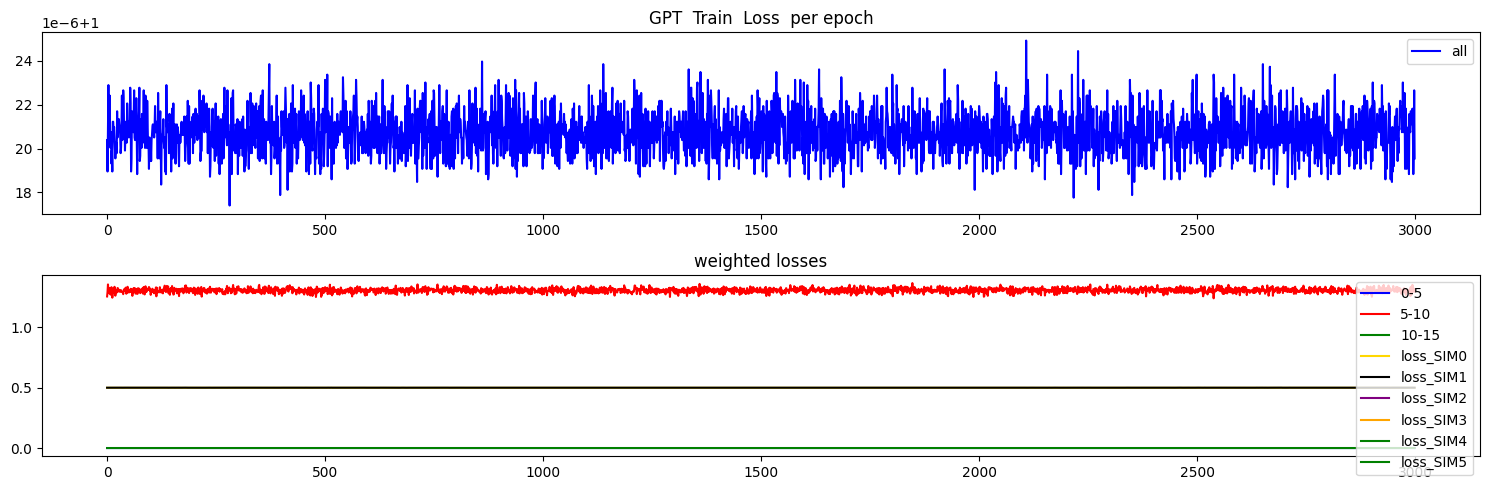

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.07388819754123688
Test MSE Loss - SI only 0-5:  0.12930895388126373
Test MSE Loss - SI only 5-10:  0.03365262597799301
Test MSE Loss - SI only 10-15:  0.04516534134745598
mae, mse, rmse, mape, mspe, rse, corr
(0.22065745, 0.0738882, 0.27182382, 2.1481903, 8.760534, 1.5600927)
Testing R**2 - SI only:  -1.4338889958761878
Testing R**2 - SI only:  -1.4338889958761878
Testing R**2 - All features:  0.9670723399777855
Testing R**2 - (f2) - SI full:  -3.274148979822332


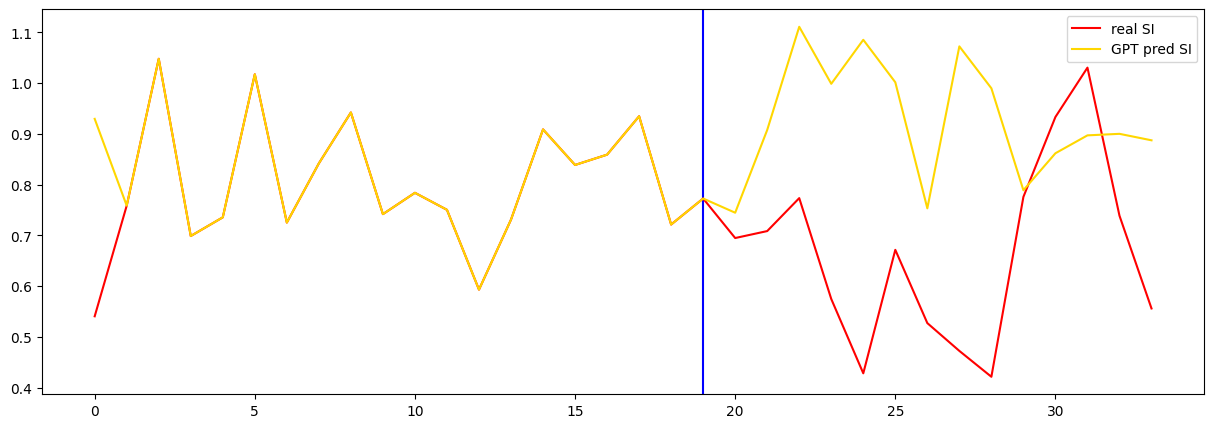

In [11]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.0000113248825073
seq length of pred =  30
[0.49990413 0.50009587]
[tensor(1.1376, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3546, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000121593475342
seq length of pred =  30
[0.4995778 0.5004222]
[tensor(1.2252, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3608, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000110864639282
seq length of pred =  30
[0.49991875 0.50008125]
[tensor(1.1078, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2468, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.0000098943710327
seq length of pred =  30
[0.49935411 0.50064589]
[tensor(0.9882, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1625, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.0000101327896118
seq length of pred =  30
[0.50004368 0.49995632]
[tensor(1.0115, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2382, devic

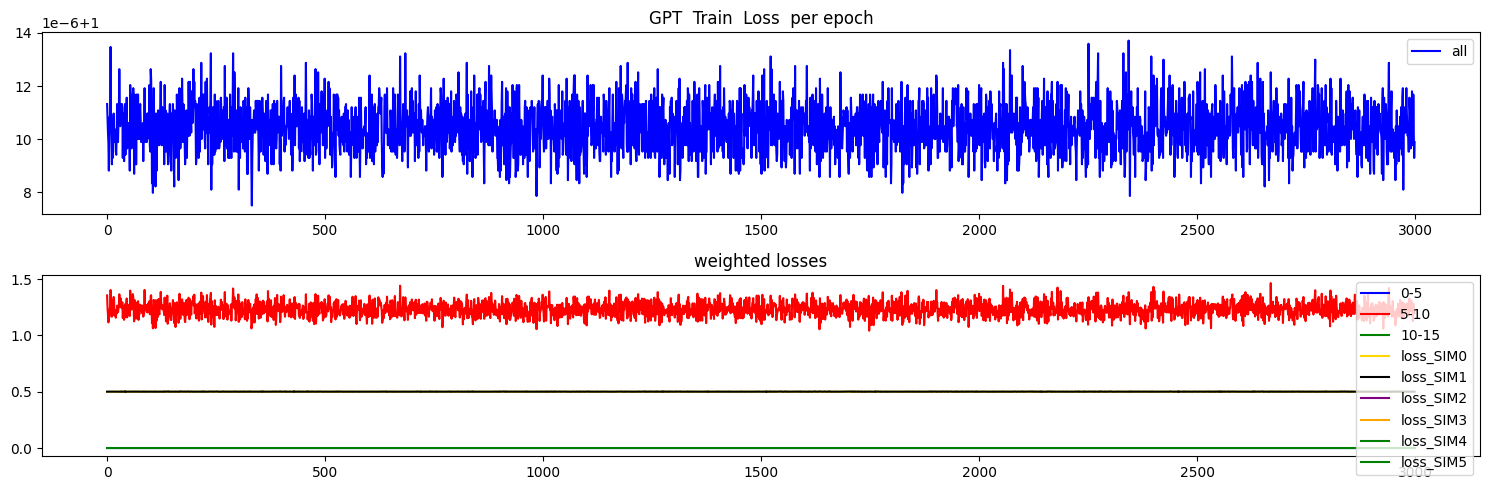

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.06636486947536469
Test MSE Loss - SI only 0-5:  0.12930895388126373
Test MSE Loss - SI only 5-10:  0.03365262597799301
Test MSE Loss - SI only 10-15:  0.04516534134745598
mae, mse, rmse, mape, mspe, rse, corr
(0.19954015, 0.06636488, 0.2576138, 2.0167837, 8.830474, 1.4785364)
Testing R**2 - SI only:  -1.1860696594932025
Testing R**2 - SI only:  -1.1860696594932025
Testing R**2 - All features:  0.9649118327341368
Testing R**2 - (f2) - SI full:  -1.6343316564608266


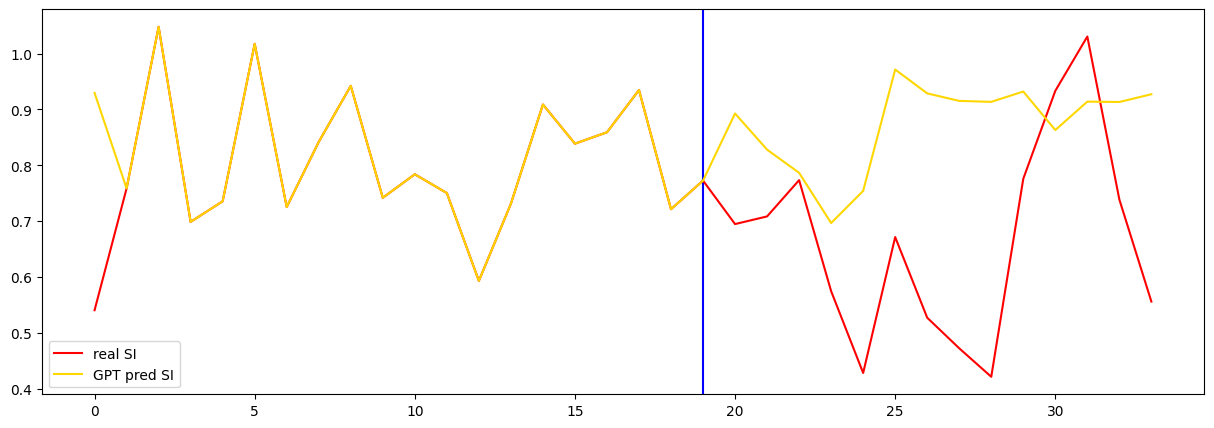

In [12]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.0000081062316895
seq length of pred =  30
[0.49931486 0.50068514]
[tensor(0.8074, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1775, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000096559524536
seq length of pred =  30
[0.49911281 0.50088719]
[tensor(0.9660, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2574, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.000009298324585
seq length of pred =  30
[0.49932197 0.50067803]
[tensor(0.9269, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2059, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.0000077486038208
seq length of pred =  30
[0.49920011 0.50079989]
[tensor(0.7770, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0114, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.000008225440979
seq length of pred =  30
[0.49956056 0.50043944]
[tensor(0.8174, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1343, devic

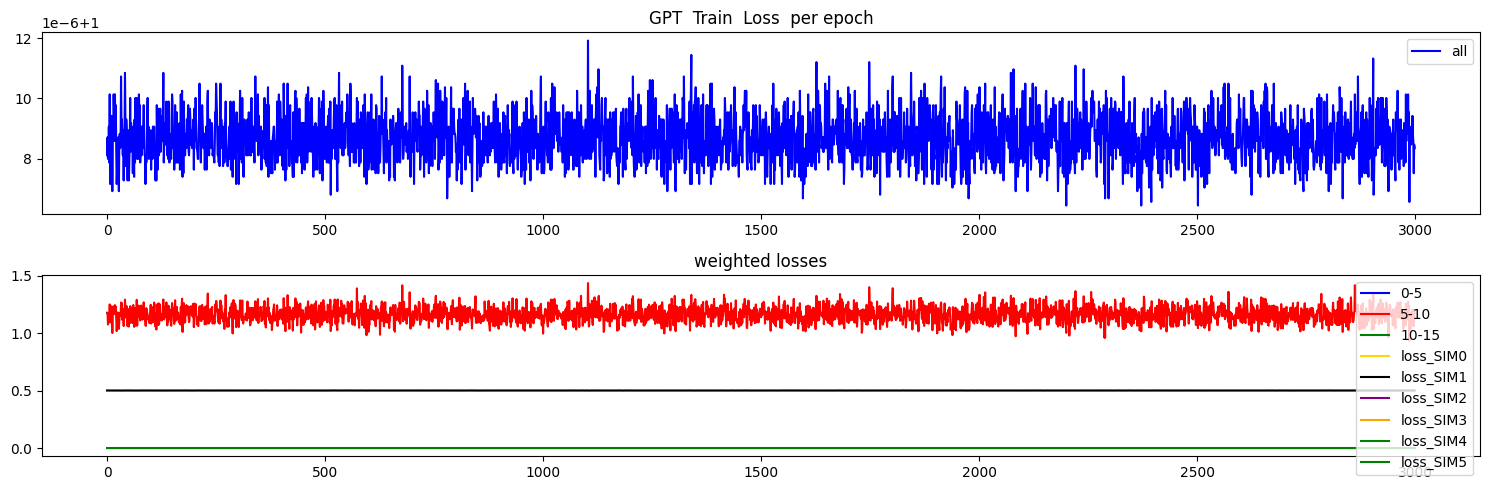

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.07454477995634079
Test MSE Loss - SI only 0-5:  0.12930895388126373
Test MSE Loss - SI only 5-10:  0.03365262597799301
Test MSE Loss - SI only 10-15:  0.04516534134745598
mae, mse, rmse, mape, mspe, rse, corr
(0.22136964, 0.07454478, 0.2730289, 2.182609, 9.160486, 1.567009)
Testing R**2 - SI only:  -1.4555171211763138
Testing R**2 - SI only:  -1.4555171211763138
Testing R**2 - All features:  0.9618744298874089
Testing R**2 - (f2) - SI full:  -0.8456968687118114


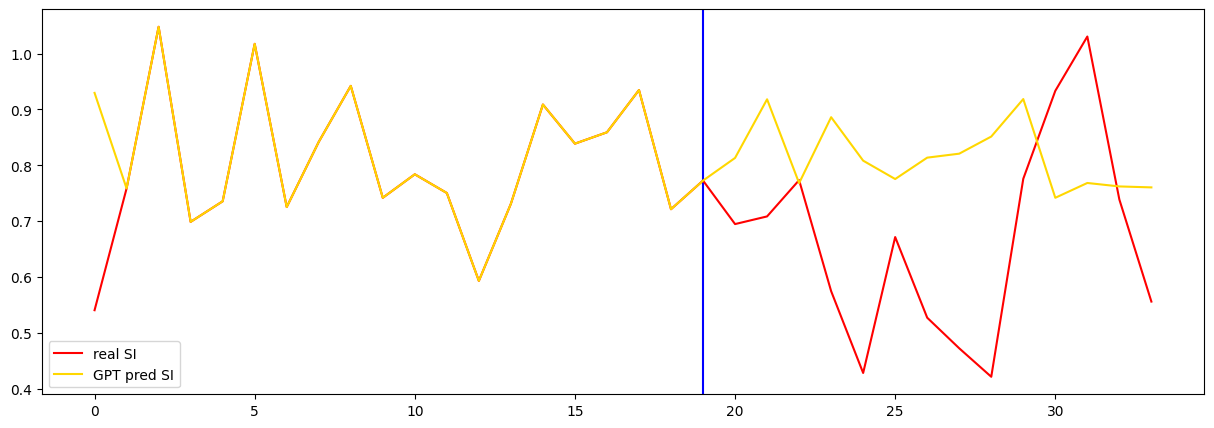

In [13]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.0000076293945312
seq length of pred =  30
[0.49974122 0.50025878]
[tensor(0.7629, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9237, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000081062316895
seq length of pred =  30
[0.49977141 0.50022859]
[tensor(0.8090, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9770, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000078678131104
seq length of pred =  30
[0.49971258 0.50028742]
[tensor(0.7822, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1181, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.000008225440979
seq length of pred =  30
[0.49968384 0.50031616]
[tensor(0.8298, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1473, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.000008463859558
seq length of pred =  30
[0.49975916 0.50024084]
[tensor(0.8451, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0714, devic

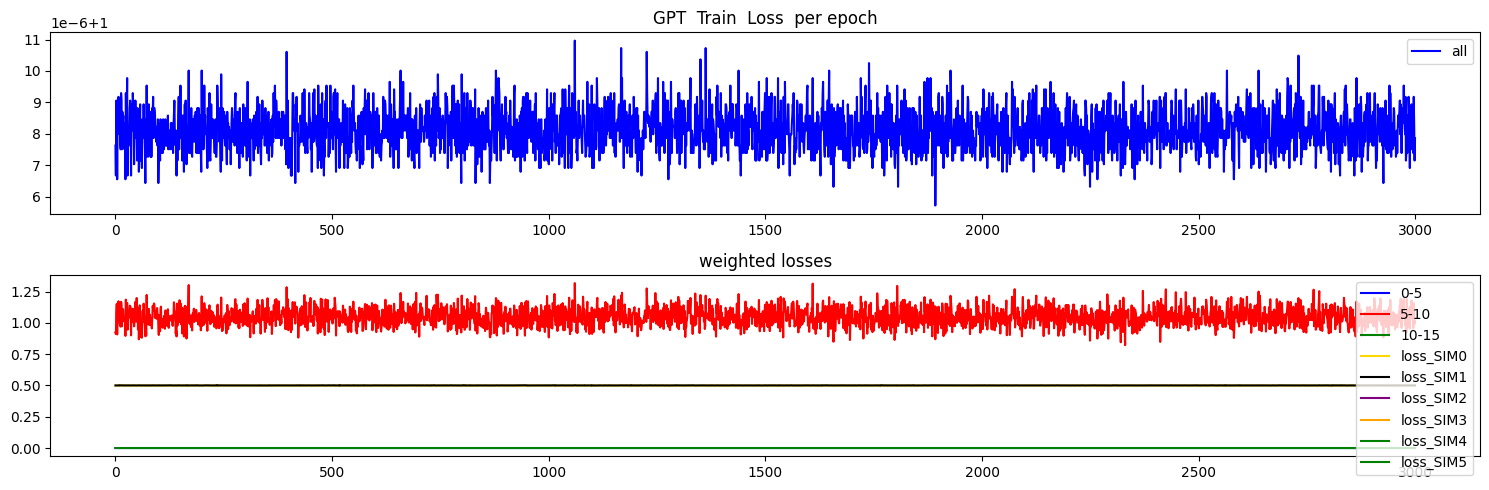

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.07397450506687164
Test MSE Loss - SI only 0-5:  0.12930895388126373
Test MSE Loss - SI only 5-10:  0.03365262597799301
Test MSE Loss - SI only 10-15:  0.04516534134745598
mae, mse, rmse, mape, mspe, rse, corr
(0.22478649, 0.07397451, 0.27198255, 2.3160825, 11.10386, 1.5610037)
Testing R**2 - SI only:  -1.4367322325745735
Testing R**2 - SI only:  -1.4367322325745735
Testing R**2 - All features:  0.9667214836965279
Testing R**2 - (f2) - SI full:  -1.8464535370800994


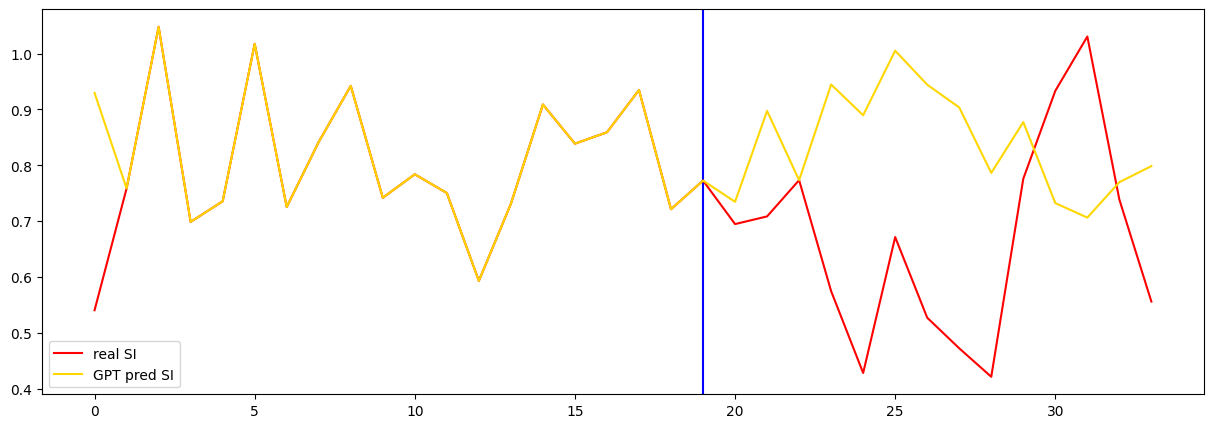

In [14]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 2


In [15]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  1.0000160932540894
seq length of pred =  30
[0.49942271 0.50057729]
[tensor(1.6164, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.5280, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000149011611938
seq length of pred =  30
[0.49961378 0.50038622]
[tensor(1.4906, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3961, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000147819519043
seq length of pred =  30
[0.4995364 0.5004636]
[tensor(1.4819, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2785, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.0000160932540894
seq length of pred =  30
[0.49941417 0.50058583]
[tensor(1.6028, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4127, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.0000160932540894
seq length of pred =  30
[0.49945092 0.50054908]
[tensor(1.6126, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4708, devic

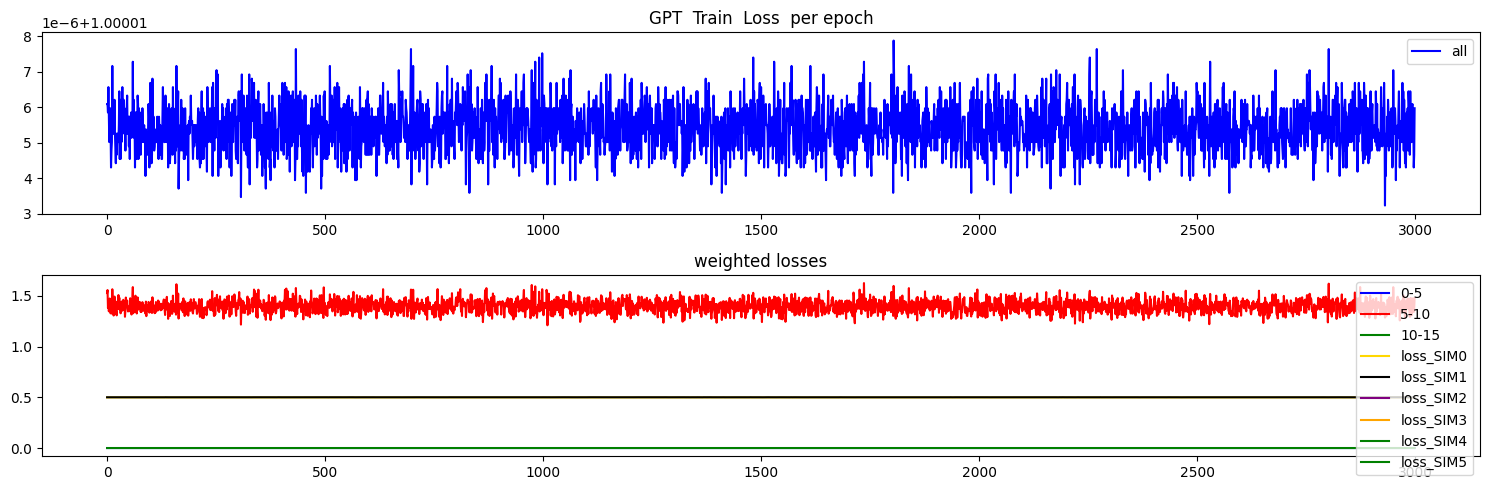

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.06428034603595734
Test MSE Loss - SI only 0-5:  0.10622527450323105
Test MSE Loss - SI only 5-10:  0.04849277436733246
Test MSE Loss - SI only 10-15:  0.03891114890575409
mae, mse, rmse, mape, mspe, rse, corr
(0.204481, 0.064280346, 0.2535357, 2.344306, 16.86836, 1.4864308)
Testing R**2 - SI only:  -1.2094759464110671
Testing R**2 - SI only:  -1.2094759464110671
Testing R**2 - All features:  0.9840379351334629
Testing R**2 - (f2) - SI full:  -1.1911040742967791


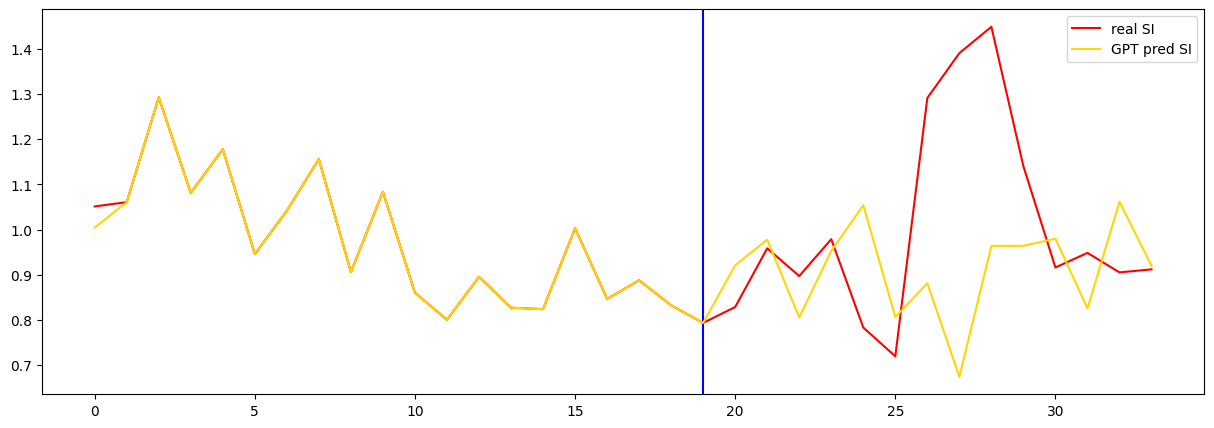

In [16]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.0000123977661133
seq length of pred =  30
[0.49978999 0.50021001]
[tensor(1.2391, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3171, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000125169754028
seq length of pred =  30
[0.49965135 0.50034865]
[tensor(1.2525, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3998, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000122785568237
seq length of pred =  30
[0.49957828 0.50042172]
[tensor(1.2316, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3071, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.000014066696167
seq length of pred =  30
[0.49981284 0.50018716]
[tensor(1.4107, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4425, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.0000137090682983
seq length of pred =  30
[0.4993773 0.5006227]
[tensor(1.3689, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.5129, device

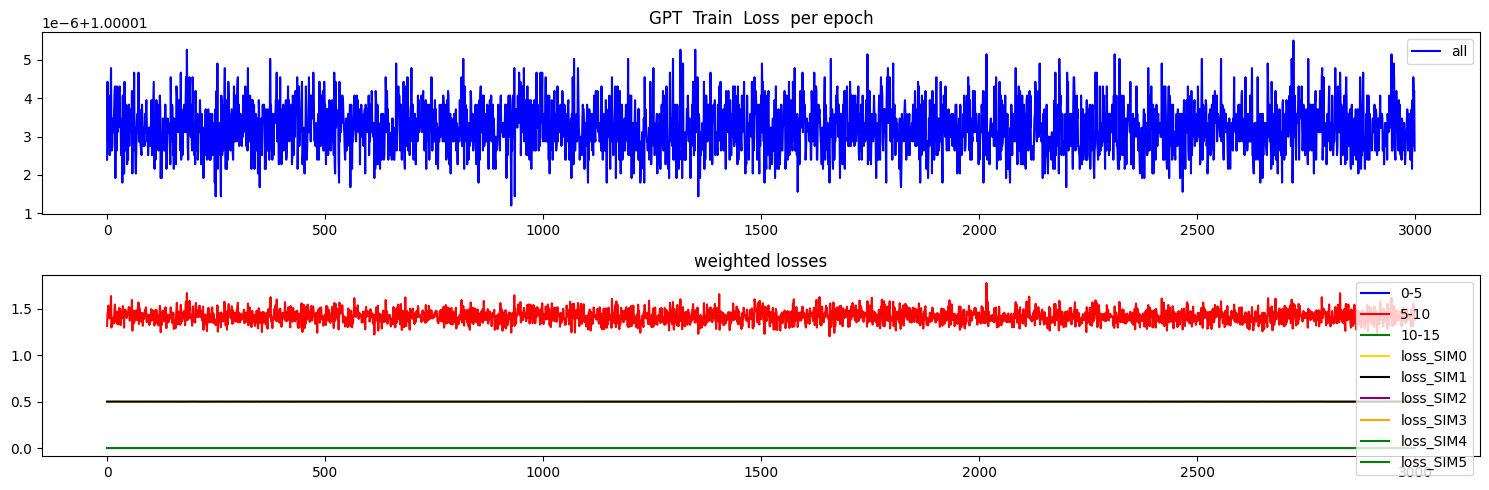

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.05368468910455704
Test MSE Loss - SI only 0-5:  0.10622527450323105
Test MSE Loss - SI only 5-10:  0.04849277436733246
Test MSE Loss - SI only 10-15:  0.03891114890575409
mae, mse, rmse, mape, mspe, rse, corr
(0.18248117, 0.05368469, 0.23169957, 2.3377678, 17.808382, 1.3584096)
Testing R**2 - SI only:  -0.8452768642634738
Testing R**2 - SI only:  -0.8452768642634738
Testing R**2 - All features:  0.9813915878151338
Testing R**2 - (f2) - SI full:  -0.18588290032058818


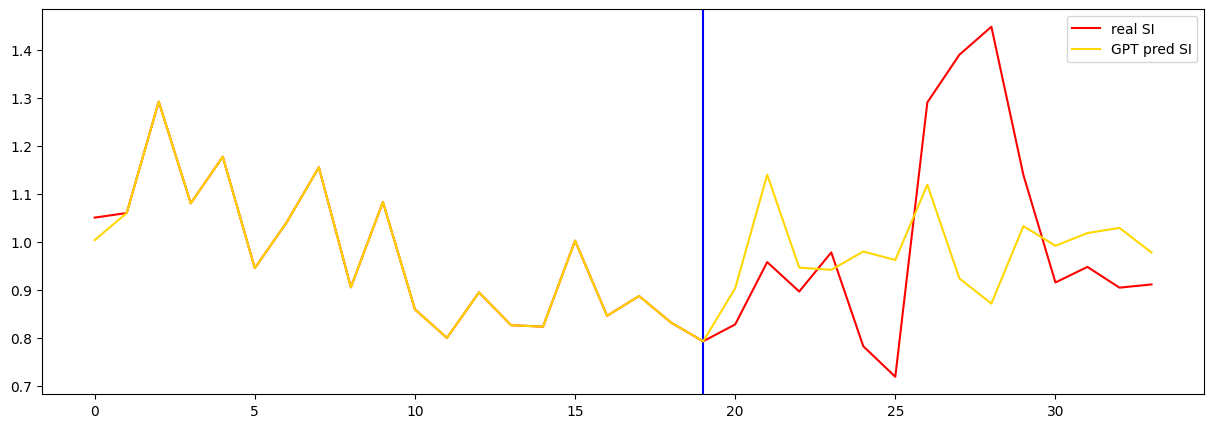

In [17]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.0000152587890625
seq length of pred =  30
[0.49931702 0.50068298]
[tensor(1.5251, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3785, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000160932540894
seq length of pred =  30
[0.49924385 0.50075615]
[tensor(1.6106, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4457, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000160932540894
seq length of pred =  30
[0.49904645 0.50095355]
[tensor(1.6110, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3456, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.0000154972076416
seq length of pred =  30
[0.49937653 0.50062347]
[tensor(1.5428, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2656, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.000016212463379
seq length of pred =  30
[0.49928528 0.50071472]
[tensor(1.6234, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3931, devi

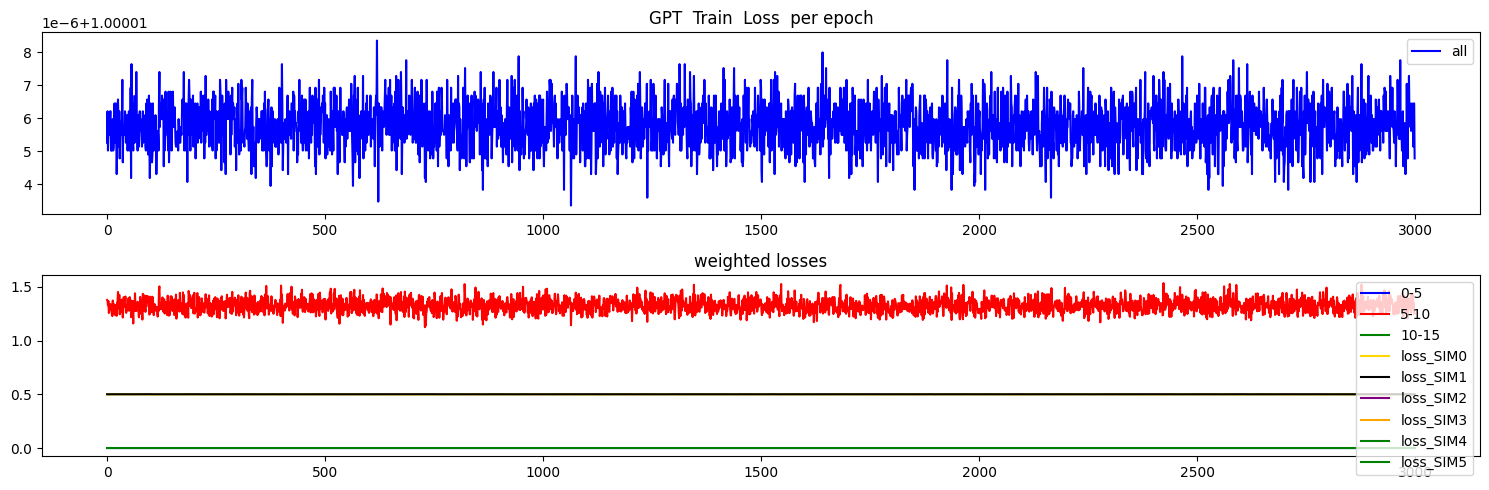

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.05939524248242378
Test MSE Loss - SI only 0-5:  0.10622527450323105
Test MSE Loss - SI only 5-10:  0.04849277436733246
Test MSE Loss - SI only 10-15:  0.03891114890575409
mae, mse, rmse, mape, mspe, rse, corr
(0.19808908, 0.059395242, 0.2437114, 2.4956772, 18.794624, 1.4288327)
Testing R**2 - SI only:  -1.0415626255271198
Testing R**2 - SI only:  -1.0415626255271198
Testing R**2 - All features:  0.9795133034076876
Testing R**2 - (f2) - SI full:  -0.12910562295200423


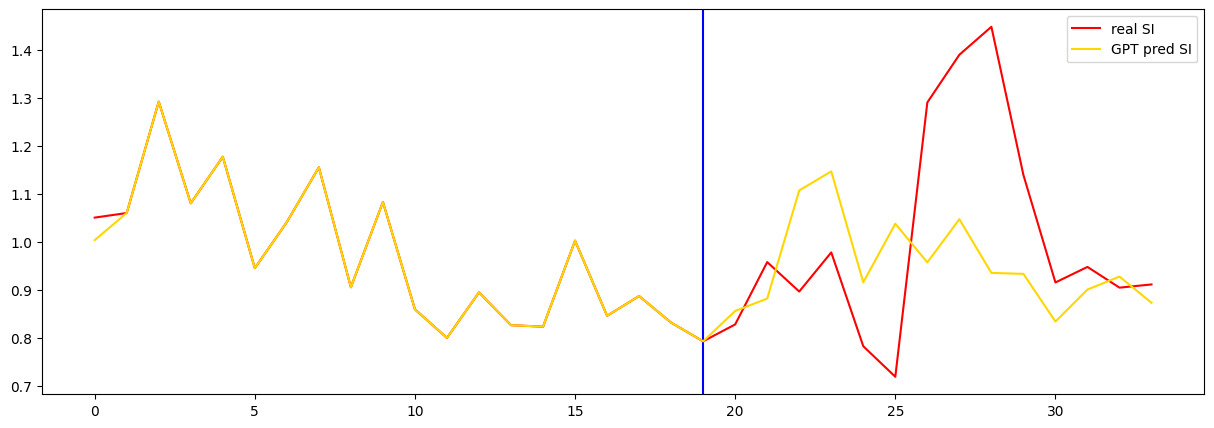

In [18]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.000014066696167
seq length of pred =  30
[0.49929944 0.50070056]
[tensor(1.4074, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1840, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000141859054565
seq length of pred =  30
[0.49915326 0.50084674]
[tensor(1.4174, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1907, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000135898590088
seq length of pred =  30
[0.49898623 0.50101377]
[tensor(1.3631, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1366, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.0000149011611938
seq length of pred =  30
[0.49935314 0.50064686]
[tensor(1.4851, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2152, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.000014066696167
seq length of pred =  30
[0.4995294 0.5004706]
[tensor(1.4071, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1149, device=

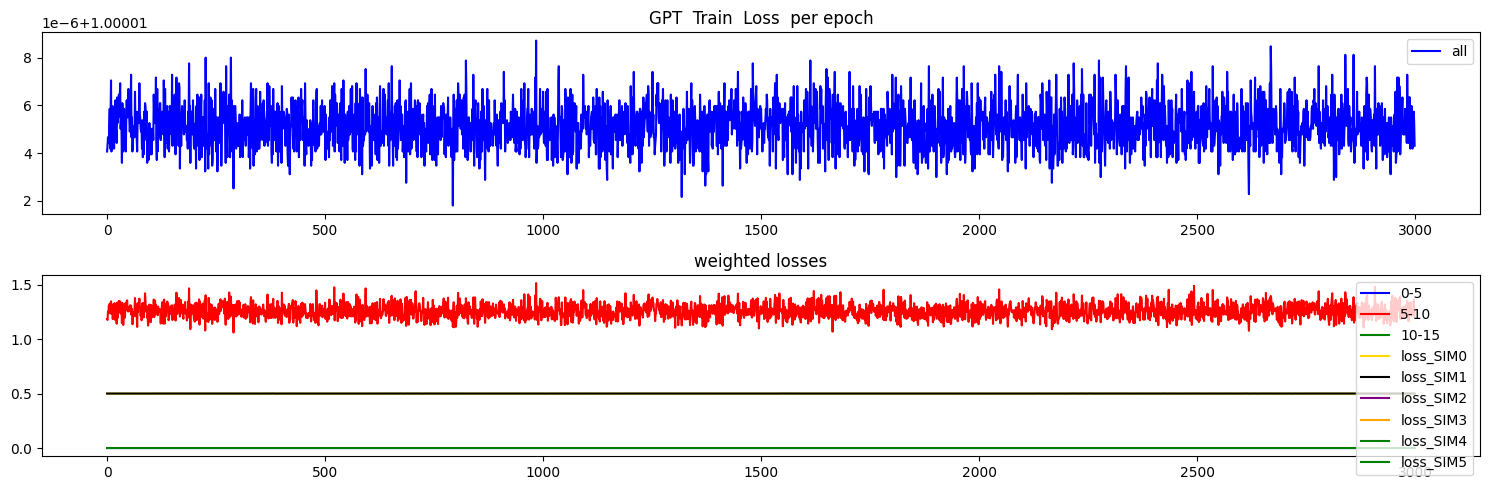

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.057675112038850784
Test MSE Loss - SI only 0-5:  0.10622526705265045
Test MSE Loss - SI only 5-10:  0.048492781817913055
Test MSE Loss - SI only 10-15:  0.03891114890575409
mae, mse, rmse, mape, mspe, rse, corr
(0.18175098, 0.05767511, 0.24015643, 2.096836, 15.777744, 1.4079906)
Testing R**2 - SI only:  -0.982437501603264
Testing R**2 - SI only:  -0.982437501603264
Testing R**2 - All features:  0.9795134088541994
Testing R**2 - (f2) - SI full:  -1.0712082222684138


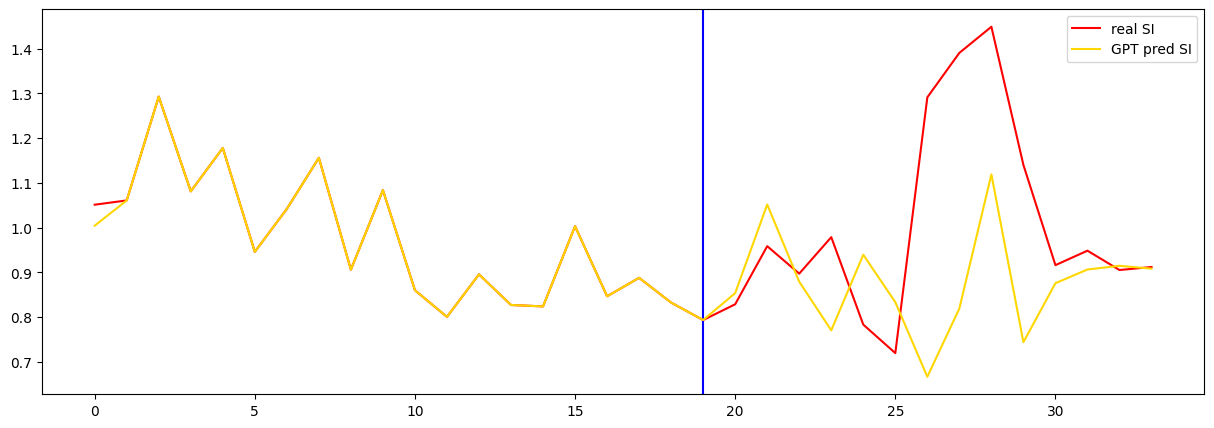

In [19]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 3


In [20]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  1.0000154972076416
seq length of pred =  30
[0.49975413 0.50024587]
[tensor(1.5439, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2000, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.000015377998352
seq length of pred =  30
[0.49970747 0.50029253]
[tensor(1.5346, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1914, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000147819519043
seq length of pred =  30
[0.50003907 0.49996093]
[tensor(1.4699, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1750, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.0000159740447998
seq length of pred =  30
[0.4999624 0.5000376]
[tensor(1.6005, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1896, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.000015139579773
seq length of pred =  30
[0.49982304 0.50017696]
[tensor(1.5171, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1794, device=

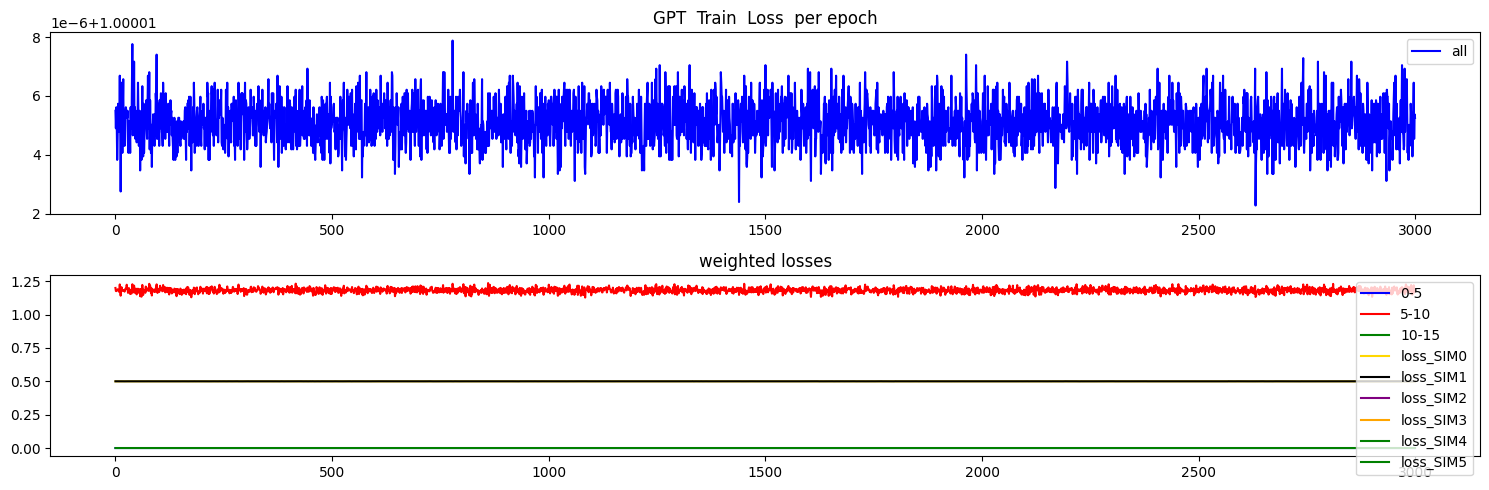

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.11553394049406052
Test MSE Loss - SI only 0-5:  0.17140744626522064
Test MSE Loss - SI only 5-10:  0.18472455441951752
Test MSE Loss - SI only 10-15:  0.07622940838336945
mae, mse, rmse, mape, mspe, rse, corr
(0.2736711, 0.11553393, 0.33990282, 4.856049, 145.59998, 1.4235232)
Testing R**2 - SI only:  -1.0264180627211967
Testing R**2 - SI only:  -1.0264180627211967
Testing R**2 - All features:  0.9840407499613086
Testing R**2 - (f2) - SI full:  -0.8651916625959126


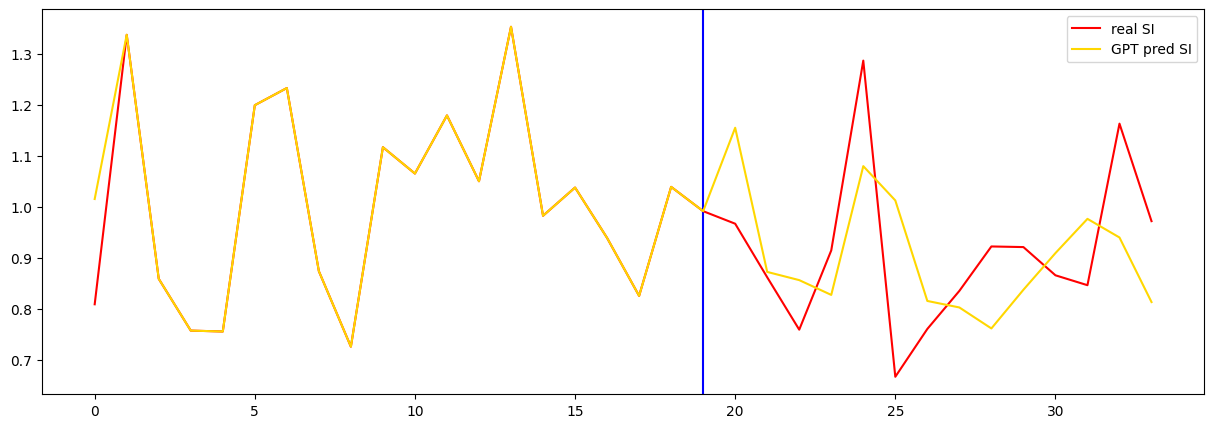

In [21]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.0000147819519043
seq length of pred =  30
[0.49949236 0.50050764]
[tensor(1.4758, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2394, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.000014066696167
seq length of pred =  30
[0.49899884 0.50100116]
[tensor(1.3988, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1812, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.000014066696167
seq length of pred =  30
[0.49888635 0.50111365]
[tensor(1.4078, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1777, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.000015377998352
seq length of pred =  30
[0.49882695 0.50117305]
[tensor(1.5366, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2640, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.0000147819519043
seq length of pred =  30
[0.49910534 0.50089466]
[tensor(1.4833, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2744, device

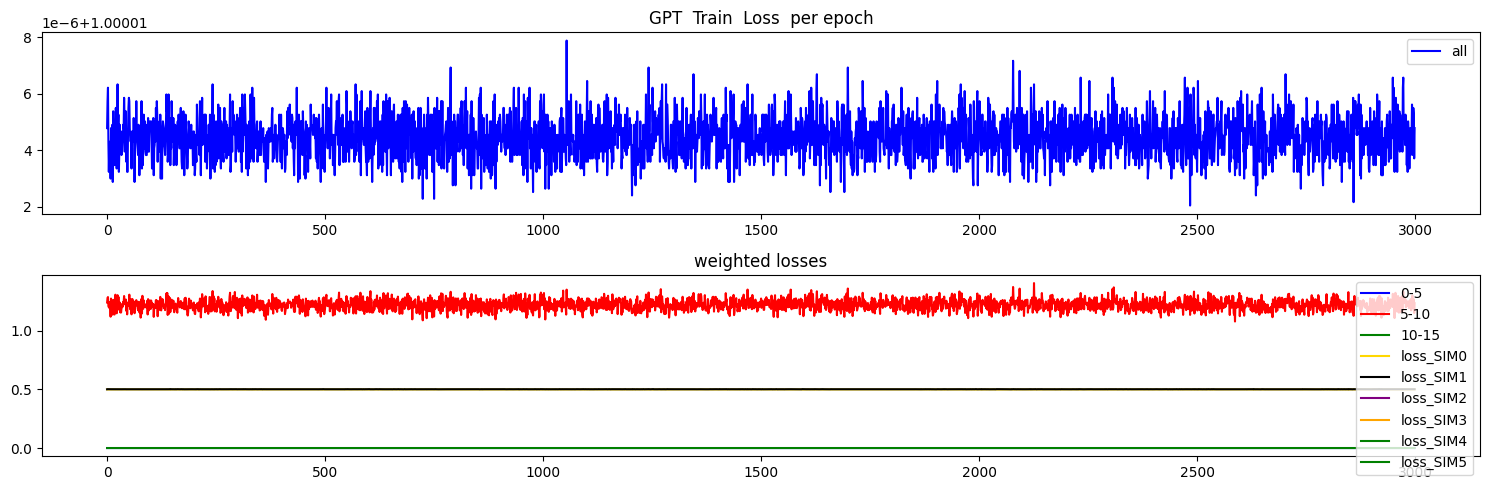

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.11324774473905563
Test MSE Loss - SI only 0-5:  0.17140744626522064
Test MSE Loss - SI only 5-10:  0.18472455441951752
Test MSE Loss - SI only 10-15:  0.07622940838336945
mae, mse, rmse, mape, mspe, rse, corr
(0.28354594, 0.113247745, 0.33652303, 5.9853754, 226.42462, 1.4093684)
Testing R**2 - SI only:  -0.9863191319022018
Testing R**2 - SI only:  -0.9863191319022018
Testing R**2 - All features:  0.9802442005191396
Testing R**2 - (f2) - SI full:  -1.509739395056363


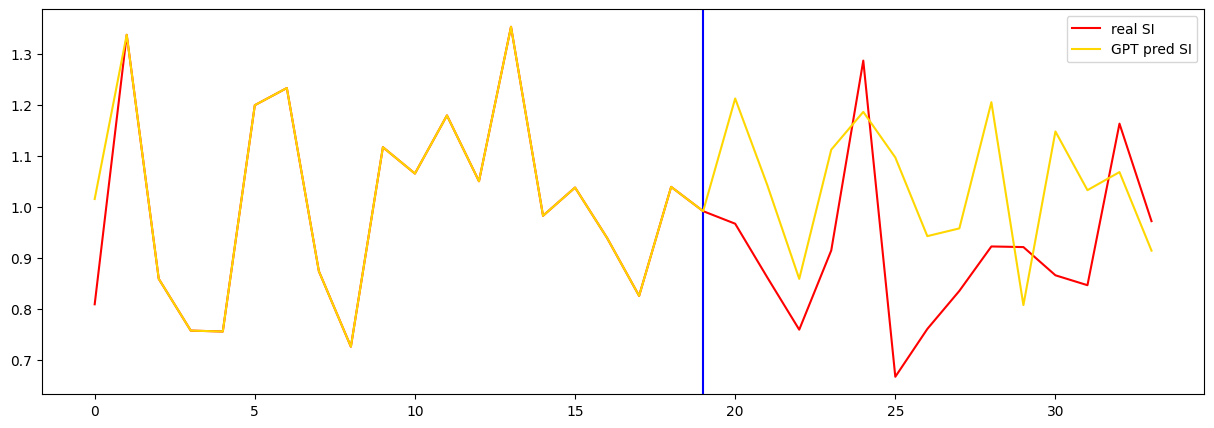

In [22]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.0000157356262207
seq length of pred =  30
[0.49875544 0.50124456]
[tensor(1.5763, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2457, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.000014066696167
seq length of pred =  30
[0.4986591 0.5013409]
[tensor(1.3990, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1288, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000128746032715
seq length of pred =  30
[0.49933618 0.50066382]
[tensor(1.2827, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1403, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.0000141859054565
seq length of pred =  30
[0.49907317 0.50092683]
[tensor(1.4127, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1789, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.000014066696167
seq length of pred =  30
[0.49870935 0.50129065]
[tensor(1.4045, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1425, device=

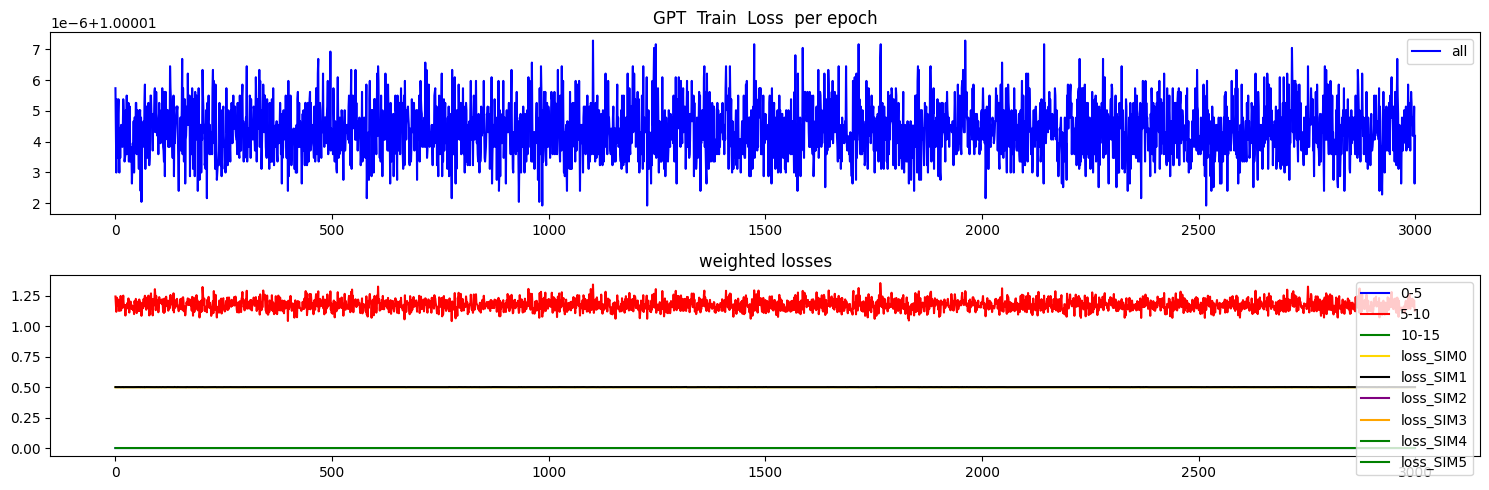

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.1258198618888855
Test MSE Loss - SI only 0-5:  0.17140744626522064
Test MSE Loss - SI only 5-10:  0.18472455441951752
Test MSE Loss - SI only 10-15:  0.07622940838336945
mae, mse, rmse, mape, mspe, rse, corr
(0.28295067, 0.12581988, 0.35471097, 5.405097, 181.16498, 1.4855402)
Testing R**2 - SI only:  -1.2068291339837711
Testing R**2 - SI only:  -1.2068291339837711
Testing R**2 - All features:  0.977617152753153
Testing R**2 - (f2) - SI full:  -2.2807409009928516


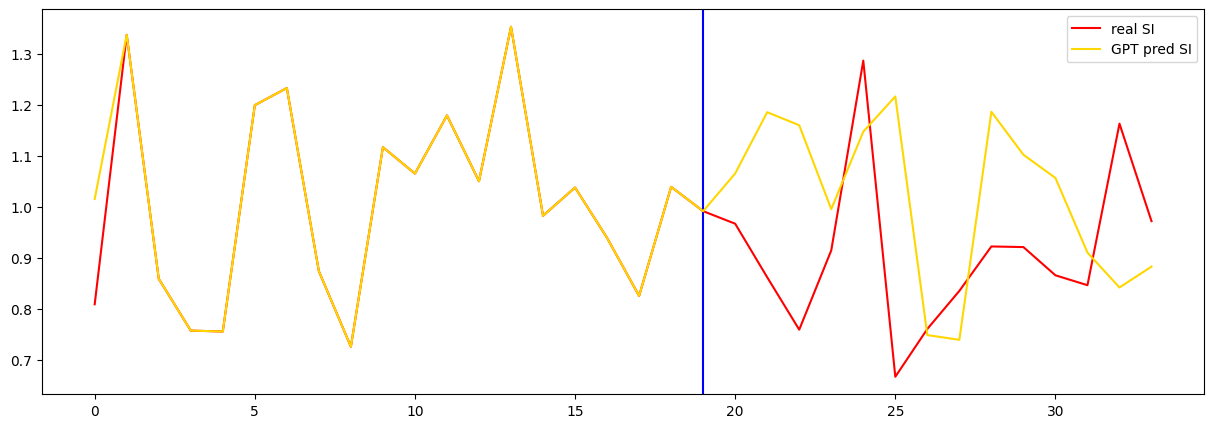

In [23]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.0000144243240356
seq length of pred =  30
[0.49950849 0.50049151]
[tensor(1.4392, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1772, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000149011611938
seq length of pred =  30
[0.49951302 0.50048698]
[tensor(1.4892, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1828, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000135898590088
seq length of pred =  30
[0.49857249 0.50142751]
[tensor(1.3624, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1176, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.0000147819519043
seq length of pred =  30
[0.49909797 0.50090203]
[tensor(1.4763, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1847, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.0000154972076416
seq length of pred =  30
[0.49963865 0.50036135]
[tensor(1.5468, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2137, dev

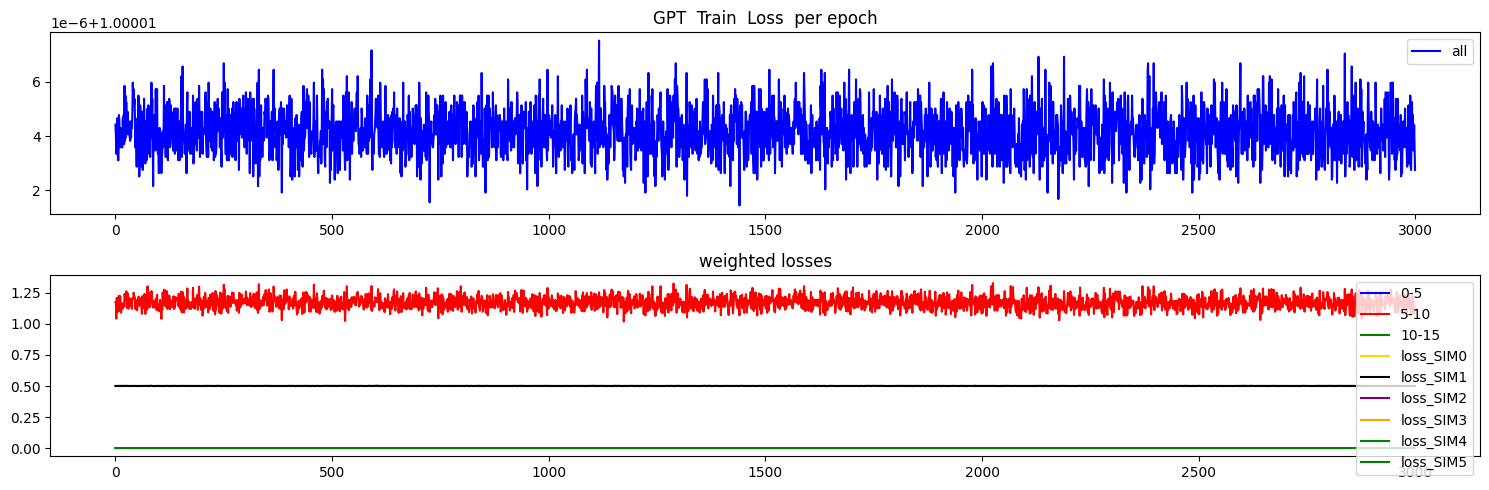

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.11168136447668076
Test MSE Loss - SI only 0-5:  0.17140744626522064
Test MSE Loss - SI only 5-10:  0.18472455441951752
Test MSE Loss - SI only 10-15:  0.07622940838336945
mae, mse, rmse, mape, mspe, rse, corr
(0.27207413, 0.11168136, 0.3341876, 5.031798, 150.40646, 1.3995876)
Testing R**2 - SI only:  -0.9588454359672636
Testing R**2 - SI only:  -0.9588454359672636
Testing R**2 - All features:  0.9694908915373476
Testing R**2 - (f2) - SI full:  -1.3464679641215729


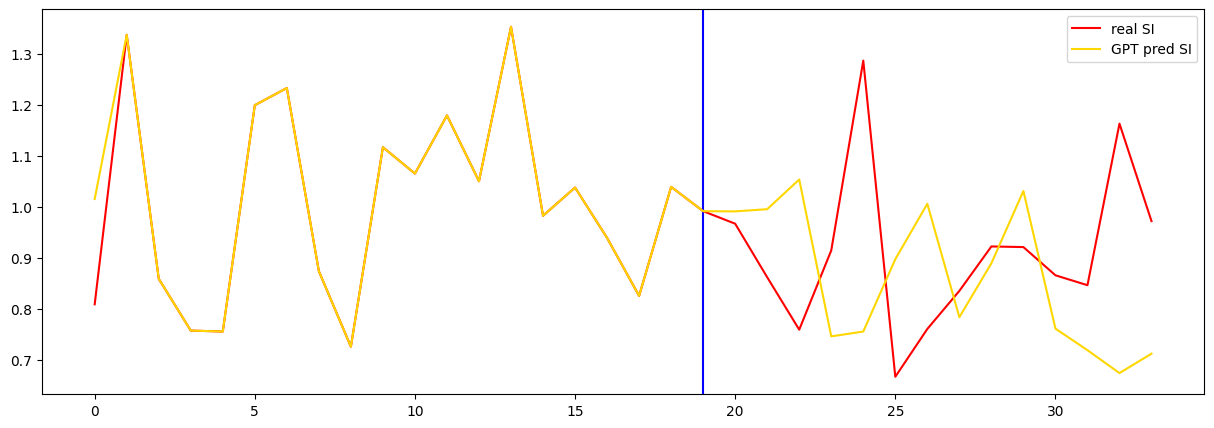

In [24]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 4


In [25]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  1.0000088214874268
seq length of pred =  30
[0.49912697 0.50087303]
[tensor(0.8748, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3560, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000081062316895
seq length of pred =  30
[0.49919612 0.50080388]
[tensor(0.8131, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3531, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000088214874268
seq length of pred =  30
[0.49889389 0.50110611]
[tensor(0.8832, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3928, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.0000085830688477
seq length of pred =  30
[0.499009 0.500991]
[tensor(0.8618, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3676, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.0000088214874268
seq length of pred =  30
[0.49915683 0.50084317]
[tensor(0.8887, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4631, device=

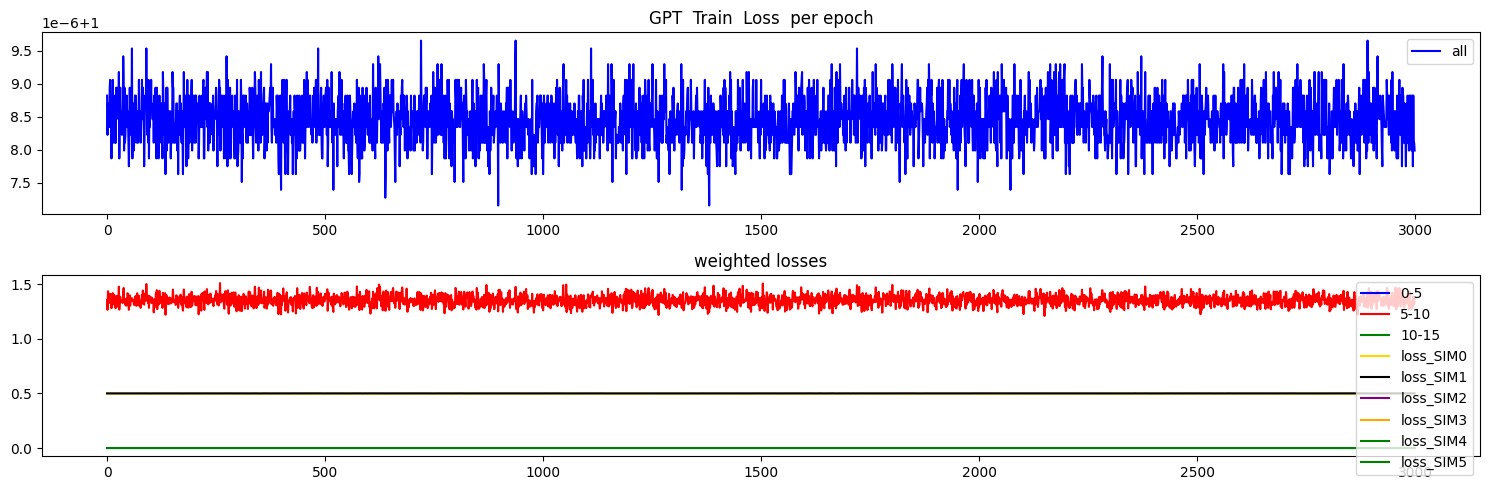

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.03306116908788681
Test MSE Loss - SI only 0-5:  0.0239485502243042
Test MSE Loss - SI only 5-10:  0.038074661046266556
Test MSE Loss - SI only 10-15:  0.007049219217151403
mae, mse, rmse, mape, mspe, rse, corr
(0.15394779, 0.03306117, 0.1818273, 8.482664, 1059.6593, 1.5293148)
Testing R**2 - SI only:  -1.3388038047128763
Testing R**2 - SI only:  -1.3388038047128763
Testing R**2 - All features:  0.994766508796281
Testing R**2 - (f2) - SI full:  -4.669851080351824


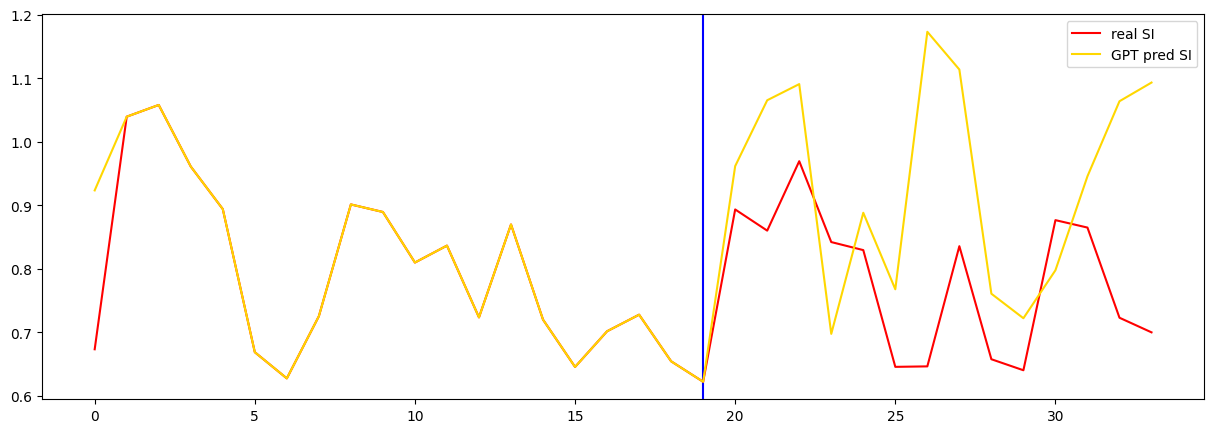

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.0000096559524536
seq length of pred =  30
[0.49906274 0.50093726]
[tensor(0.9654, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1932, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000100135803223
seq length of pred =  30
[0.49926129 0.50073871]
[tensor(0.9990, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2403, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000102519989014
seq length of pred =  30
[0.49879071 0.50120929]
[tensor(1.0329, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2671, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.000009298324585
seq length of pred =  30
[0.49961018 0.50038982]
[tensor(0.9311, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0963, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.000009298324585
seq length of pred =  30
[0.49891969 0.50108031]
[tensor(0.9303, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2175, devic

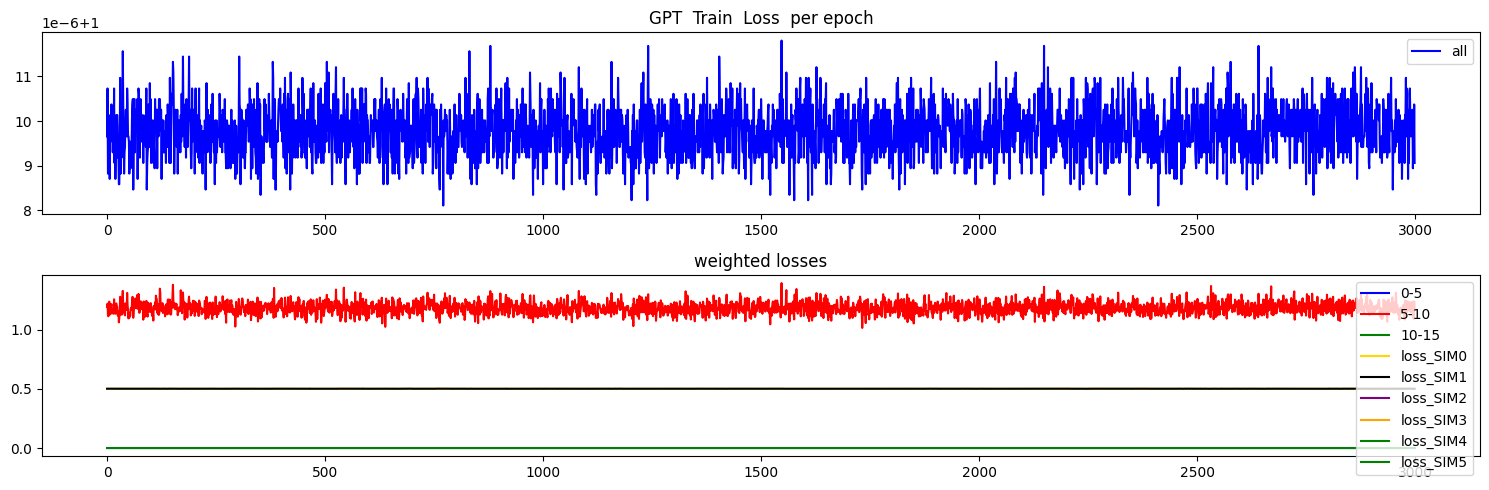

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.028050970286130905
Test MSE Loss - SI only 0-5:  0.0239485502243042
Test MSE Loss - SI only 5-10:  0.038074661046266556
Test MSE Loss - SI only 10-15:  0.007049219217151403
mae, mse, rmse, mape, mspe, rse, corr
(0.13286102, 0.02805097, 0.16748424, 10.156821, 1920.9224, 1.408678)
Testing R**2 - SI only:  -0.9843738134275175
Testing R**2 - SI only:  -0.9843738134275175
Testing R**2 - All features:  0.988839105083094
Testing R**2 - (f2) - SI full:  -4.902003159162407


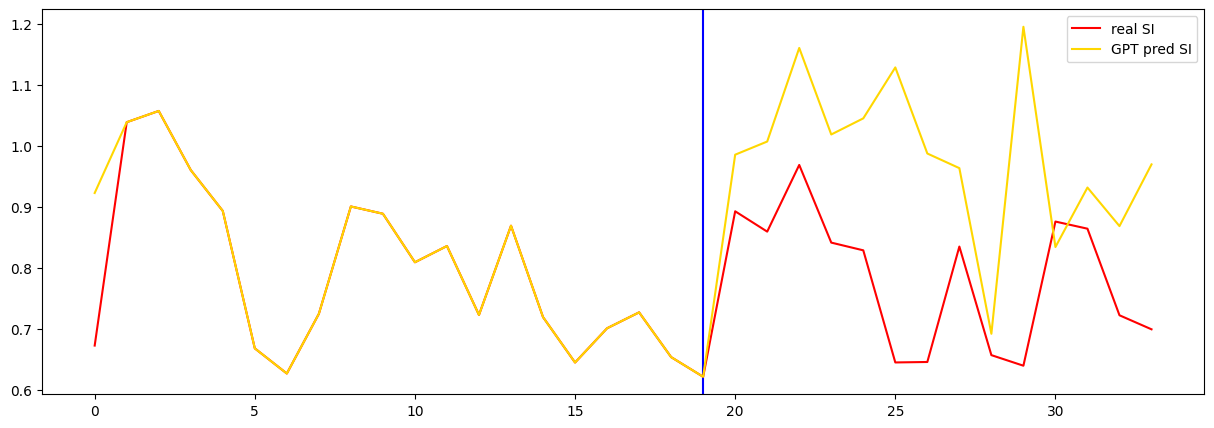

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.0000083446502686
seq length of pred =  30
[0.49984154 0.50015846]
[tensor(0.8312, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0105, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.000010371208191
seq length of pred =  30
[0.49953617 0.50046383]
[tensor(1.0346, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0192, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000097751617432
seq length of pred =  30
[0.49942346 0.50057654]
[tensor(0.9805, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0221, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.0000097751617432
seq length of pred =  30
[0.49940413 0.50059587]
[tensor(0.9835, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0176, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.000011682510376
seq length of pred =  30
[0.49952682 0.50047318]
[tensor(1.1618, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0843, devic

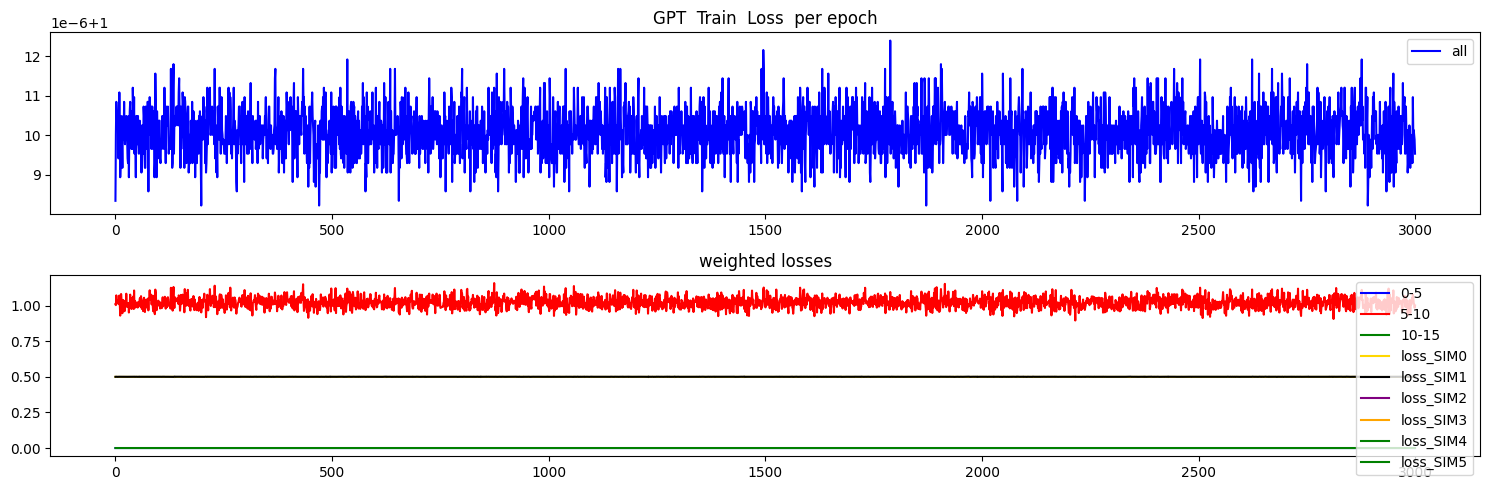

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.021574057638645172
Test MSE Loss - SI only 0-5:  0.0239485502243042
Test MSE Loss - SI only 5-10:  0.038074661046266556
Test MSE Loss - SI only 10-15:  0.007049219217151403
mae, mse, rmse, mape, mspe, rse, corr
(0.12674491, 0.021574058, 0.1468811, 4.5047417, 133.81918, 1.235389)
Testing R**2 - SI only:  -0.5261859181841972
Testing R**2 - SI only:  -0.5261859181841972
Testing R**2 - All features:  0.9687297074080362
Testing R**2 - (f2) - SI full:  -14.048337326825317


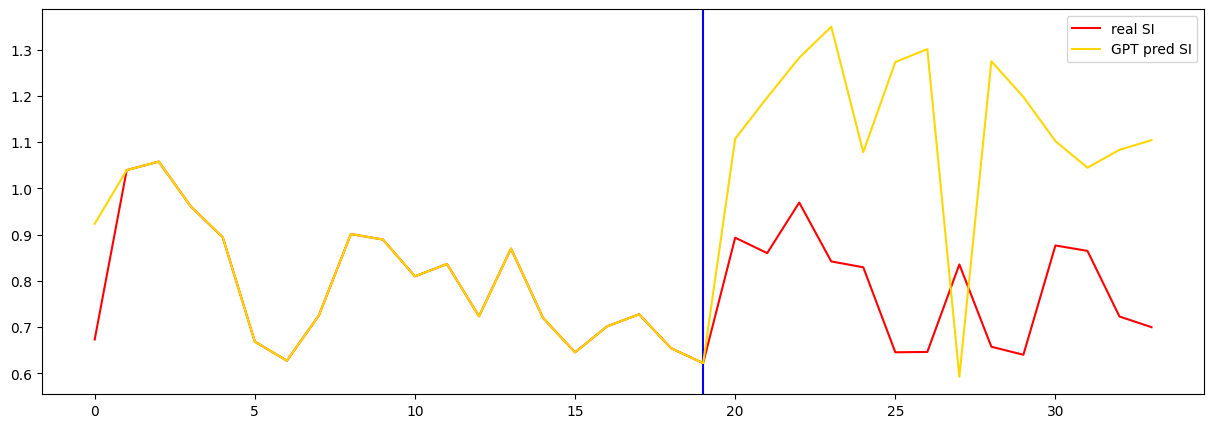

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.0000104904174805
seq length of pred =  30
[0.49938144 0.50061856]
[tensor(1.0557, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0218, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000121593475342
seq length of pred =  30
[0.49977832 0.50022168]
[tensor(1.2159, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0717, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000121593475342
seq length of pred =  30
[0.49927459 0.50072541]
[tensor(1.2219, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0734, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.0000114440917969
seq length of pred =  30
[0.49990188 0.50009812]
[tensor(1.1407, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0752, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.000012993812561
seq length of pred =  30
[0.49970255 0.50029745]
[tensor(1.3008, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0934, devi

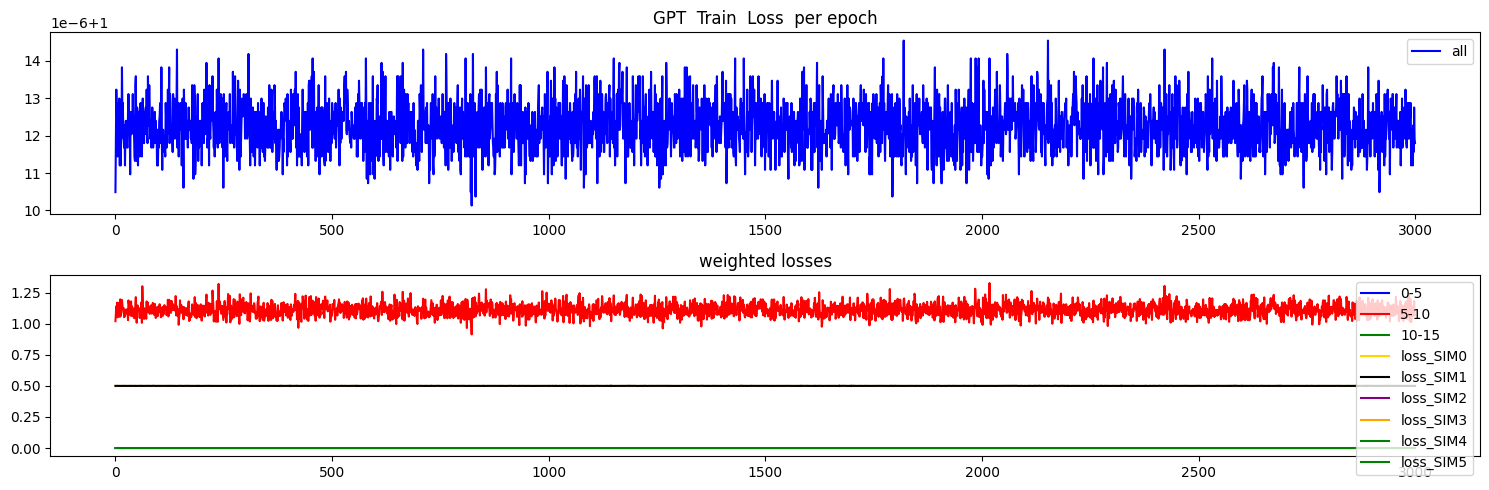

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.023240219801664352
Test MSE Loss - SI only 0-5:  0.02394854836165905
Test MSE Loss - SI only 5-10:  0.038074661046266556
Test MSE Loss - SI only 10-15:  0.007049219217151403
mae, mse, rmse, mape, mspe, rse, corr
(0.12766773, 0.02324022, 0.15244743, 3.5744286, 73.30698, 1.2822064)
Testing R**2 - SI only:  -0.6440530578507291
Testing R**2 - SI only:  -0.6440530578507291
Testing R**2 - All features:  0.9907647439078143
Testing R**2 - (f2) - SI full:  -4.48548099181456


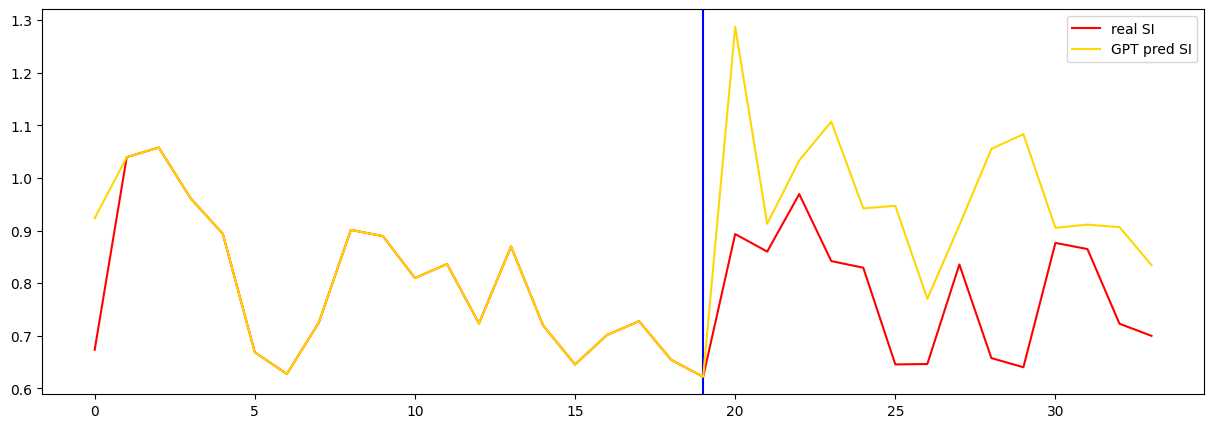

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Run 5


In [30]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  1.0000203847885132
seq length of pred =  30
[0.49974918 0.50025082]
[tensor(2.0358, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2291, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000218152999878
seq length of pred =  30
[0.49972123 0.50027877]
[tensor(2.1826, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2273, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.000020146369934
seq length of pred =  30
[0.49995185 0.50004815]
[tensor(2.0141, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2391, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.000020146369934
seq length of pred =  30
[0.49985749 0.50014251]
[tensor(2.0188, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1848, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.0000202655792236
seq length of pred =  30
[0.49965203 0.50034797]
[tensor(2.0306, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2214, devic

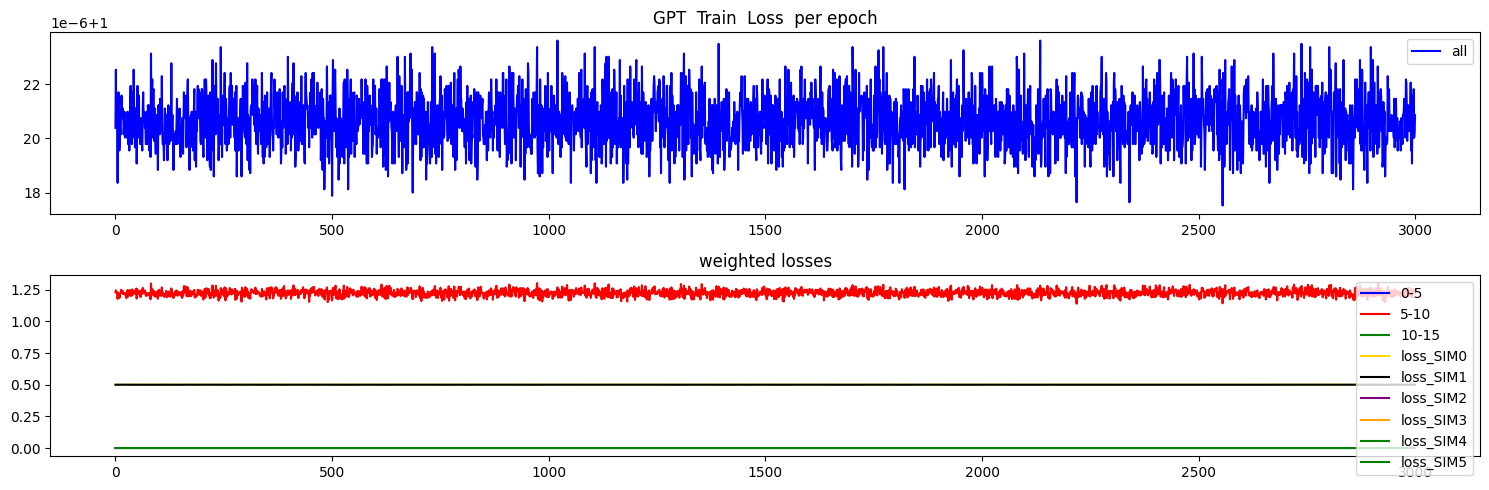

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.04986489564180374
Test MSE Loss - SI only 0-5:  0.11337659507989883
Test MSE Loss - SI only 5-10:  0.09330961108207703
Test MSE Loss - SI only 10-15:  0.018714135512709618
mae, mse, rmse, mape, mspe, rse, corr
(0.18343069, 0.049864896, 0.2233045, 2.7584705, 33.225876, 1.3765521)
Testing R**2 - SI only:  -0.8948955191105088
Testing R**2 - SI only:  -0.8948955191105088
Testing R**2 - All features:  0.9831482942919745
Testing R**2 - (f2) - SI full:  0.02075219371530379


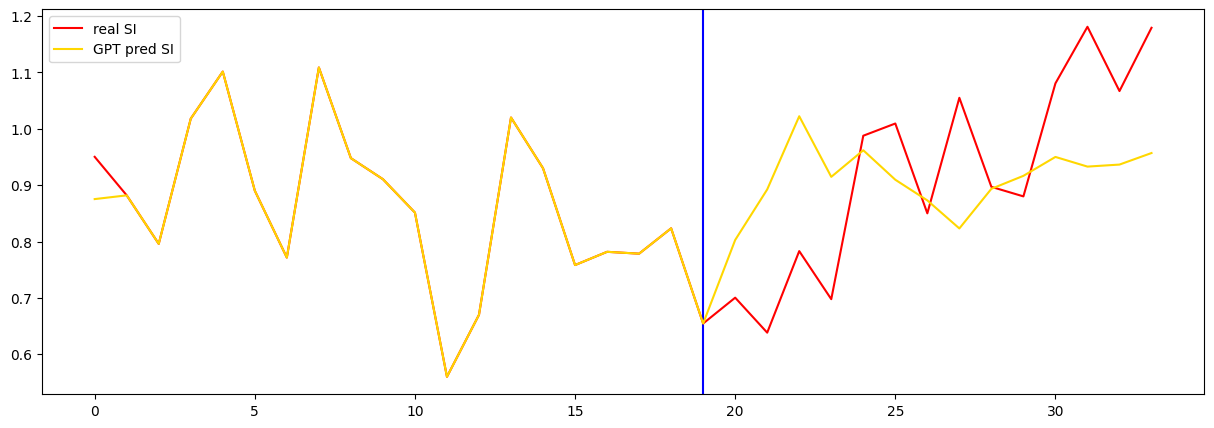

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.0000208616256714
seq length of pred =  30
[0.49943047 0.50056953]
[tensor(2.0869, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3935, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000207424163818
seq length of pred =  30
[0.4989771 0.5010229]
[tensor(2.0781, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3739, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000213384628296
seq length of pred =  30
[0.49923772 0.50076228]
[tensor(2.1331, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3630, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.0000190734863281
seq length of pred =  30
[0.4994611 0.5005389]
[tensor(1.9116, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2474, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.0000208616256714
seq length of pred =  30
[0.4995913 0.5004087]
[tensor(2.0827, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3454, device='c

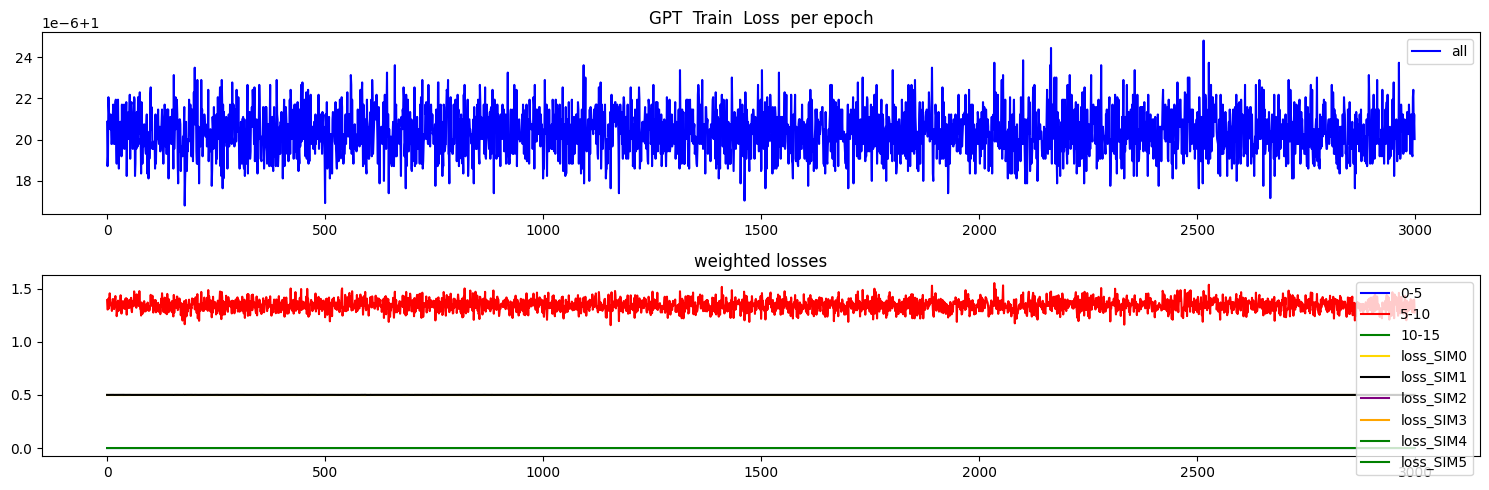

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.046760860830545425
Test MSE Loss - SI only 0-5:  0.11337659507989883
Test MSE Loss - SI only 5-10:  0.09330961108207703
Test MSE Loss - SI only 10-15:  0.018714135512709618
mae, mse, rmse, mape, mspe, rse, corr
(0.17246847, 0.046760865, 0.21624261, 2.8828435, 34.95478, 1.3330194)
Testing R**2 - SI only:  -0.7769404042354862
Testing R**2 - SI only:  -0.7769404042354862
Testing R**2 - All features:  0.9790549581814503
Testing R**2 - (f2) - SI full:  -0.8374465244183675


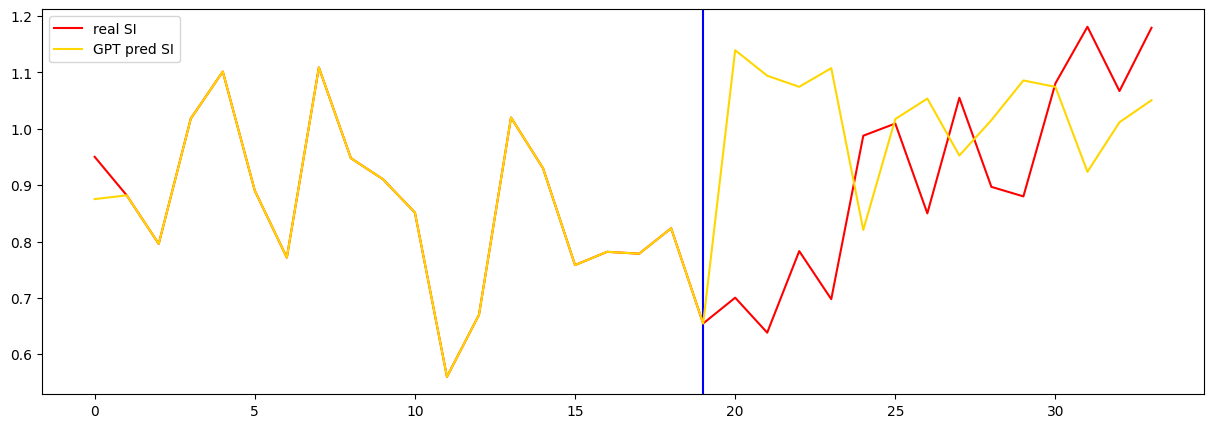

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.000015139579773
seq length of pred =  30
[0.49944292 0.50055708]
[tensor(1.5171, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2714, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000145435333252
seq length of pred =  30
[0.4995303 0.5004697]
[tensor(1.4574, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2311, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000146627426147
seq length of pred =  30
[0.49967833 0.50032167]
[tensor(1.4664, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1986, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.0000133514404297
seq length of pred =  30
[0.49958543 0.50041457]
[tensor(1.3438, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1915, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.000014305114746
seq length of pred =  30
[0.49959857 0.50040143]
[tensor(1.4367, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1711, device=

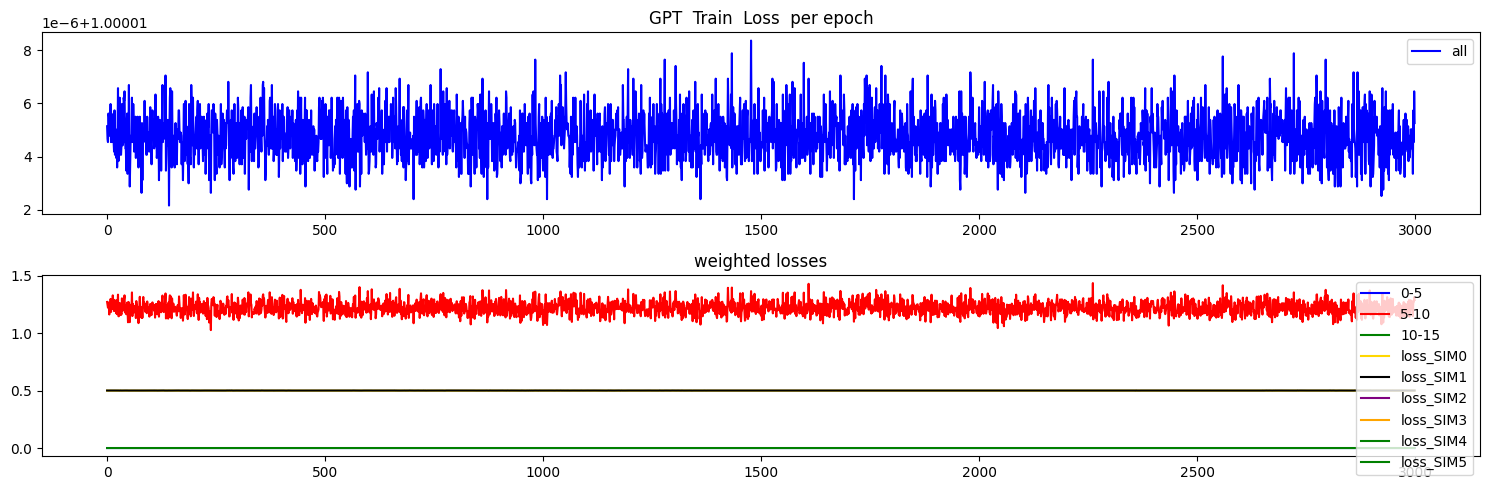

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.05692789703607559
Test MSE Loss - SI only 0-5:  0.11337659507989883
Test MSE Loss - SI only 5-10:  0.09330961108207703
Test MSE Loss - SI only 10-15:  0.018714135512709618
mae, mse, rmse, mape, mspe, rse, corr
(0.19849914, 0.056927897, 0.23859568, 2.8365202, 33.487072, 1.470814)
Testing R**2 - SI only:  -1.1632938560370936
Testing R**2 - SI only:  -1.1632938560370936
Testing R**2 - All features:  0.9746393021653497
Testing R**2 - (f2) - SI full:  -0.8730106481465938


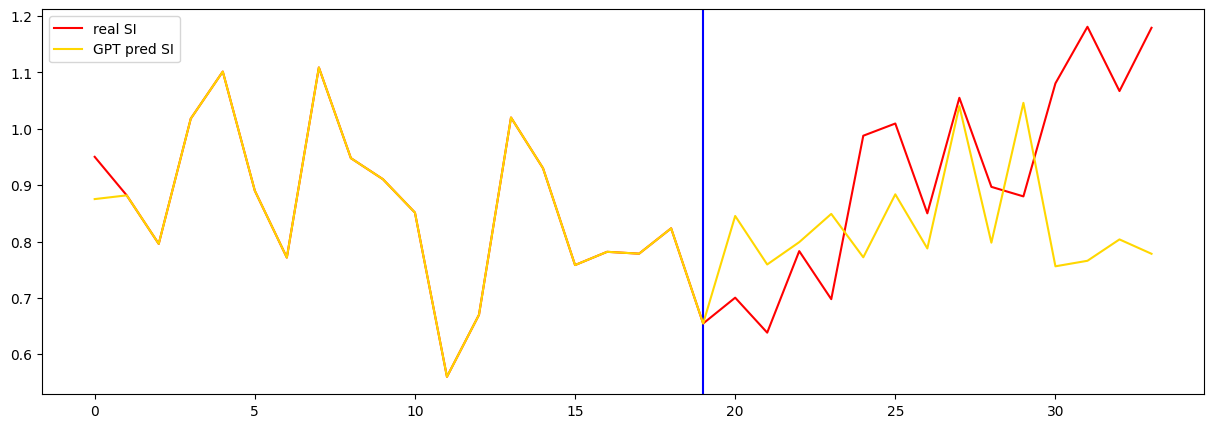

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )


0 train loss =  1.0000171661376953
seq length of pred =  30
[0.49975151 0.50024849]
[tensor(1.7096, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2507, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000170469284058
seq length of pred =  30
[0.49965497 0.50034503]
[tensor(1.7053, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2406, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000157356262207
seq length of pred =  30
[0.49963556 0.50036444]
[tensor(1.5790, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1980, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.0000171661376953
seq length of pred =  30
[0.49973547 0.50026453]
[tensor(1.7107, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2730, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.000016689300537
seq length of pred =  30
[0.49953751 0.50046249]
[tensor(1.6753, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.1896, devi

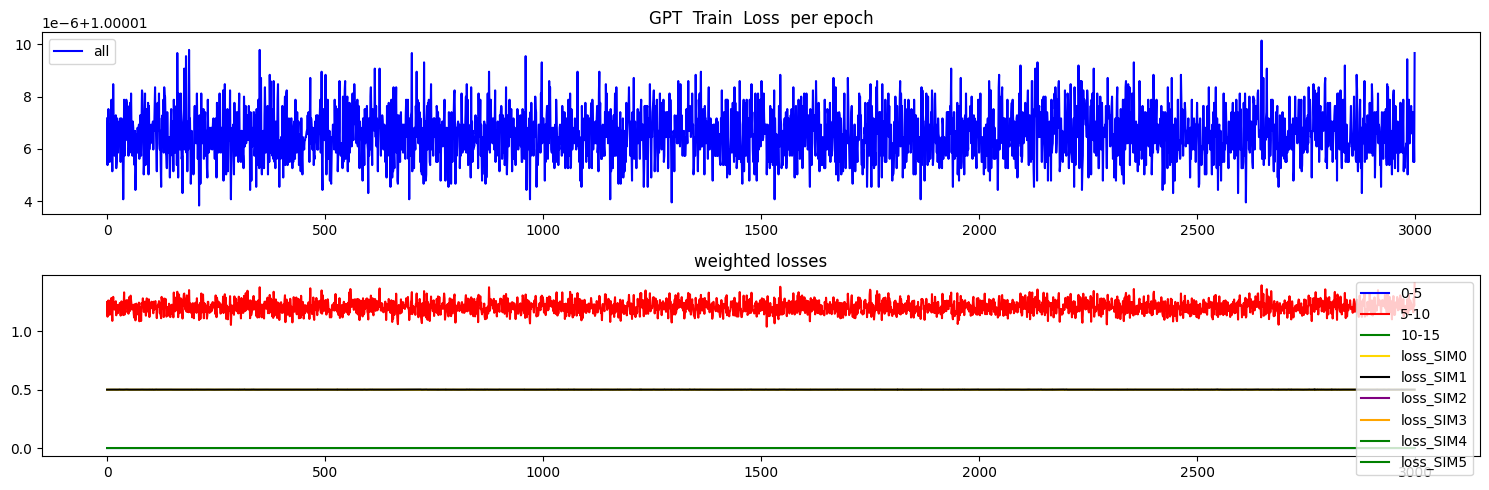

max tokens  14
torch.Size([1, 20, 27])
(34,)
(34,)
Test MSE Loss - SI only:  0.0510648675262928
Test MSE Loss - SI only 0-5:  0.11337659507989883
Test MSE Loss - SI only 5-10:  0.09330961108207703
Test MSE Loss - SI only 10-15:  0.018714135512709618
mae, mse, rmse, mape, mspe, rse, corr
(0.18411806, 0.051064868, 0.22597536, 2.8690631, 34.249813, 1.3930166)
Testing R**2 - SI only:  -0.9404951497686258
Testing R**2 - SI only:  -0.9404951497686258
Testing R**2 - All features:  0.981734135435029
Testing R**2 - (f2) - SI full:  -0.9684955569672717


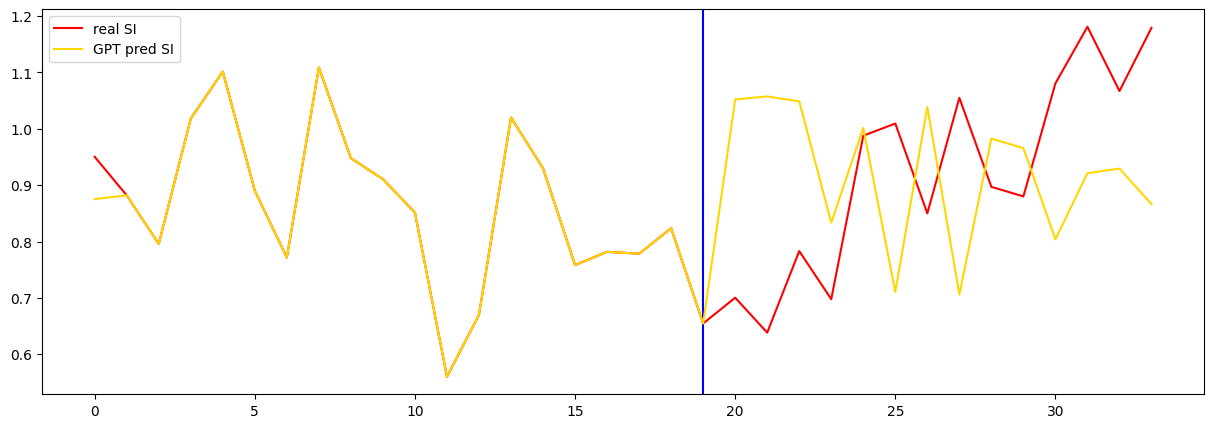

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 14  )



## Train on Train, Test on Train



## 000 to 015


0 train loss =  1.0000104904174805
seq length of pred =  30
[0.4988226 0.5011774]
[tensor(1.0594, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4003, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000104904174805
seq length of pred =  30
[0.49858886 0.50141114]
[tensor(1.0546, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3830, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000102519989014
seq length of pred =  30
[0.49831149 0.50168851]
[tensor(1.0216, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2776, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.0000107288360596
seq length of pred =  30
[0.49877312 0.50122688]
[tensor(1.0766, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3536, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.0000109672546387
seq length of pred =  30
[0.49834597 0.50165403]
[tensor(1.0994, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3993, devic

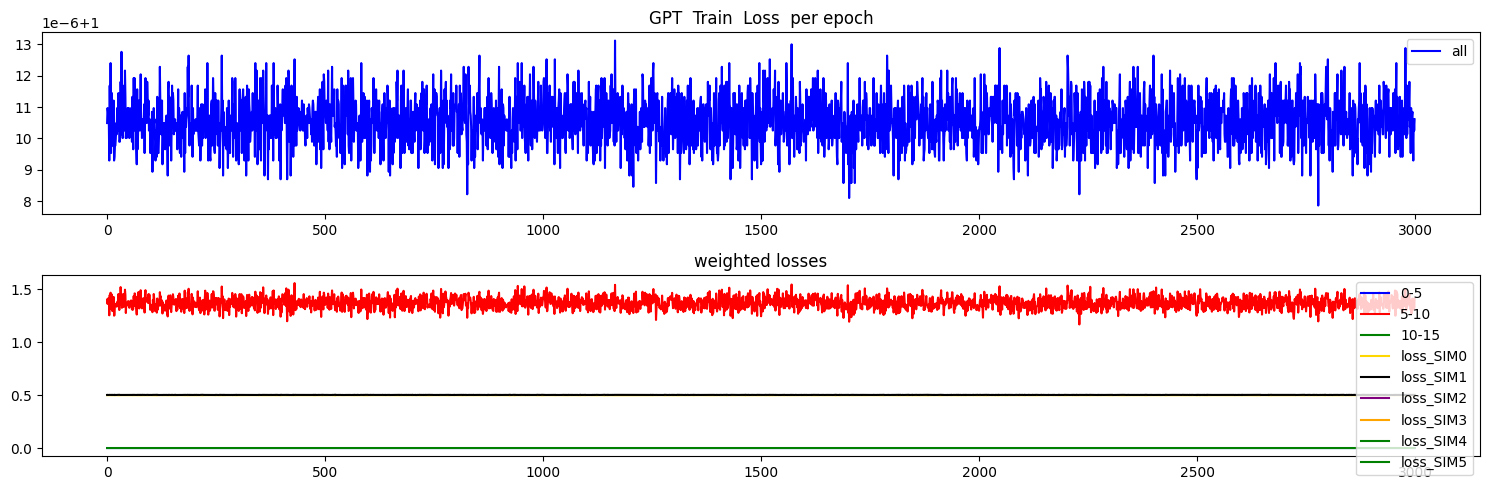

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.05316911265254021
Test MSE Loss - SI only 0-5:  0.014422965236008167
Test MSE Loss - SI only 5-10:  0.04397165775299072
Test MSE Loss - SI only 10-15:  0.018369589000940323
mae, mse, rmse, mape, mspe, rse, corr
(0.14396808, 0.05316911, 0.23058428, 4.406358, 128.2327, 1.065486)
Testing R**2 - SI only:  -0.13526019399448663
Testing R**2 - SI only:  -0.13526019399448663
Testing R**2 - All features:  0.9439366513262943
Testing R**2 - (f2) - SI full:  -0.46011081378559515


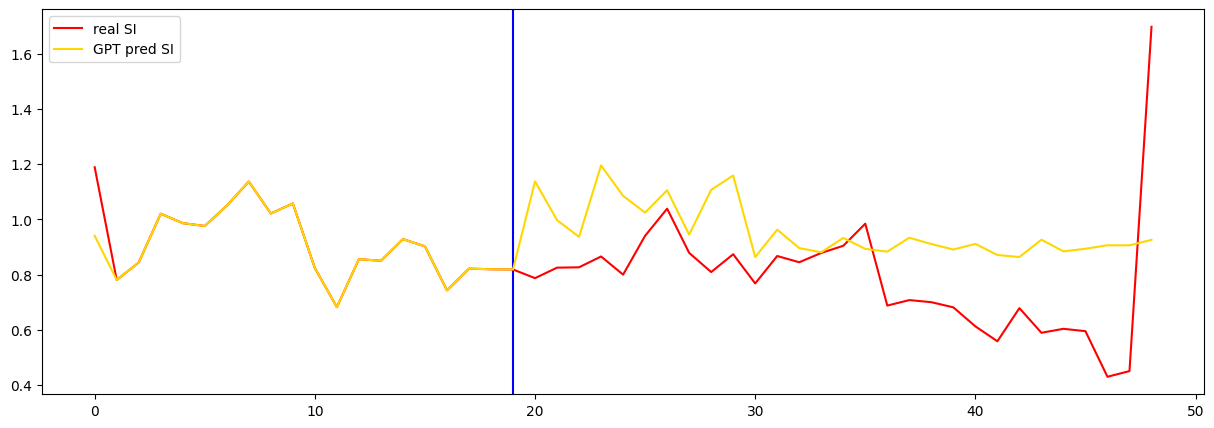

In [35]:

inferenceGPT_obj.the_offset = 0
train_CIVS, test_CIVS                                    = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  train_CIVS  ) 
results_string  = inferenceGPT_obj.function_test_rc( train_CIVS, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 015 to 030


0 train loss =  1.000022053718567
seq length of pred =  30
[0.49977061 0.50022939]
[tensor(2.2025, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.6924, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000224113464355
seq length of pred =  30
[0.49987007 0.50012993]
[tensor(2.2346, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.6358, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.000020980834961
seq length of pred =  30
[0.49984003 0.50015997]
[tensor(2.1002, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.6307, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.0000208616256714
seq length of pred =  30
[0.49999564 0.50000436]
[tensor(2.0856, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.6630, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.0000205039978027
seq length of pred =  30
[0.49993557 0.50006443]
[tensor(2.0439, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.5591, devic

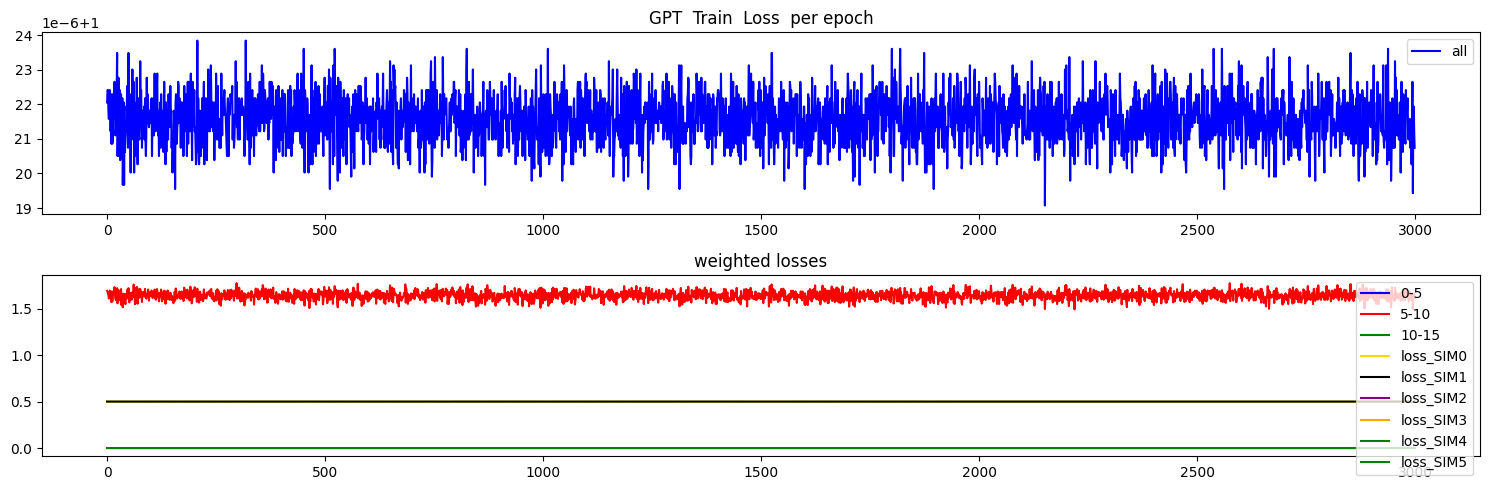

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.08931181579828262
Test MSE Loss - SI only 0-5:  0.13228654861450195
Test MSE Loss - SI only 5-10:  0.0808892548084259
Test MSE Loss - SI only 10-15:  0.13668349385261536
mae, mse, rmse, mape, mspe, rse, corr
(0.25069845, 0.089311816, 0.29885083, 19.535793, 11922.885, 1.2432135)
Testing R**2 - SI only:  -0.5455800460042837
Testing R**2 - SI only:  -0.5455800460042837
Testing R**2 - All features:  0.9669196421675071
Testing R**2 - (f2) - SI full:  -0.08949435208690737


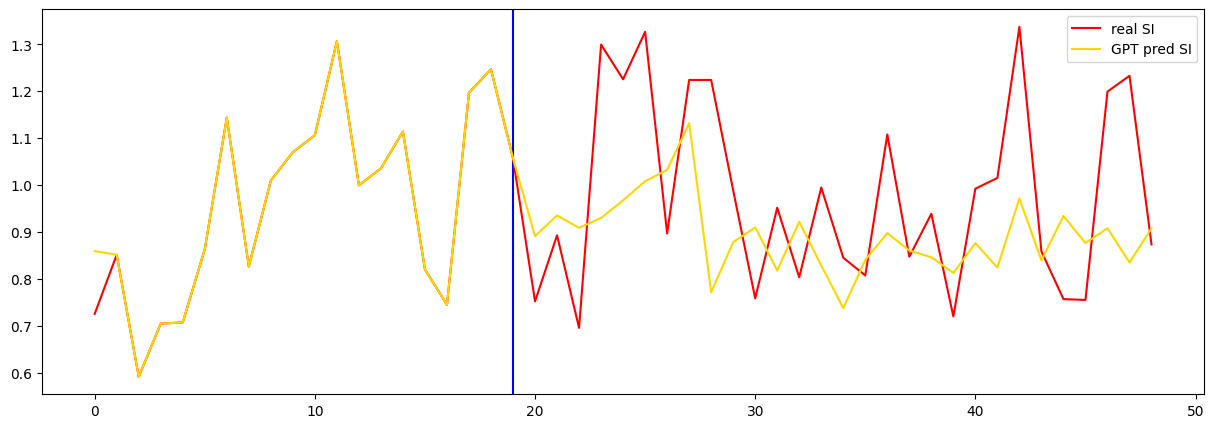

In [36]:

inferenceGPT_obj.the_offset = 15
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 030 to 045


0 train loss =  1.0000128746032715
seq length of pred =  30
[0.49931238 0.50068762]
[tensor(1.2939, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0229, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000134706497192
seq length of pred =  30
[0.49962159 0.50037841]
[tensor(1.3473, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0559, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.000014066696167
seq length of pred =  30
[0.49935416 0.50064584]
[tensor(1.4050, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0406, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.0000128746032715
seq length of pred =  30
[0.49955243 0.50044757]
[tensor(1.2932, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.0020, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.0000128746032715
seq length of pred =  30
[0.49952811 0.50047189]
[tensor(1.2871, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(0.9699, devi

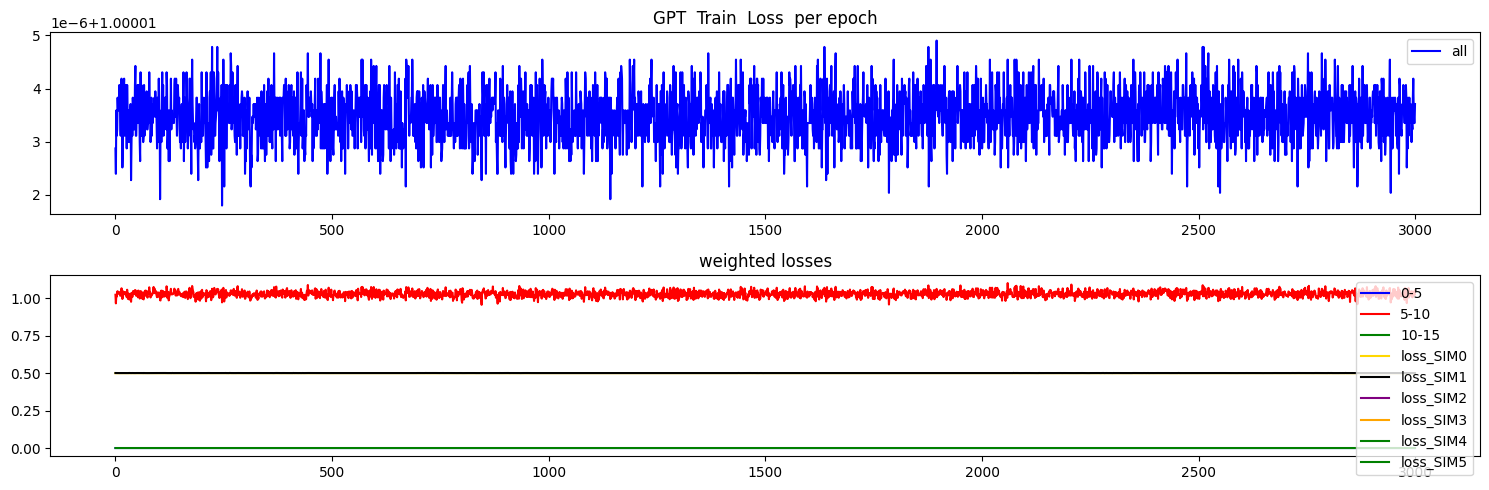

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.03870510682463646
Test MSE Loss - SI only 0-5:  0.05092291906476021
Test MSE Loss - SI only 5-10:  0.03762676939368248
Test MSE Loss - SI only 10-15:  0.013662924990057945
mae, mse, rmse, mape, mspe, rse, corr
(0.15968496, 0.038705103, 0.19673613, 3.2673683, 35.77495, 1.419301)
Testing R**2 - SI only:  -1.014415276002723
Testing R**2 - SI only:  -1.014415276002723
Testing R**2 - All features:  0.9612925676637256
Testing R**2 - (f2) - SI full:  -0.8575407470407492


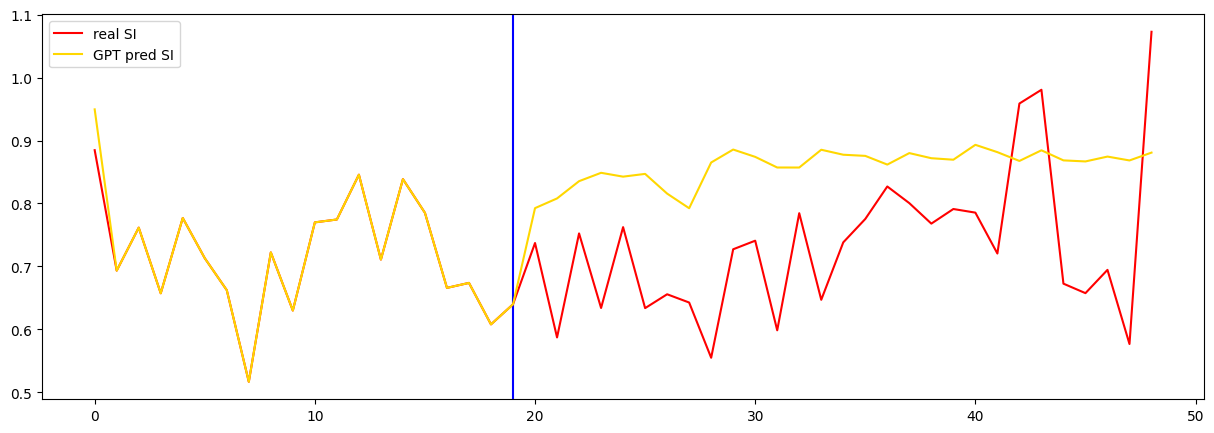

In [37]:

inferenceGPT_obj.the_offset = 30
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 045 to 060


0 train loss =  1.0000180006027222
seq length of pred =  30
[0.49908662 0.50091338]
[tensor(1.8009, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4193, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000176429748535
seq length of pred =  30
[0.4993705 0.5006295]
[tensor(1.7699, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4184, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000207424163818
seq length of pred =  30
[0.49965207 0.50034793]
[tensor(2.0825, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.6204, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.000017762184143
seq length of pred =  30
[0.49926969 0.50073031]
[tensor(1.7759, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3828, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.0000194311141968
seq length of pred =  30
[0.49941 0.50059]
[tensor(1.9440, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4571, device='cuda

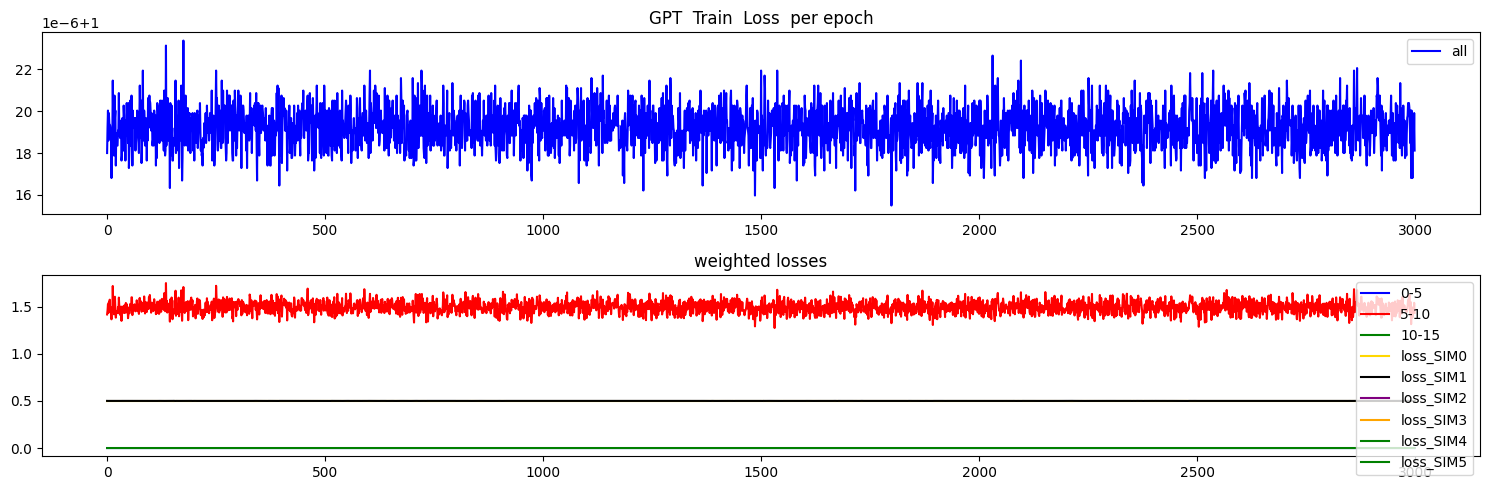

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.11709899455308914
Test MSE Loss - SI only 0-5:  0.29026561975479126
Test MSE Loss - SI only 5-10:  0.09324035793542862
Test MSE Loss - SI only 10-15:  0.13625316321849823
mae, mse, rmse, mape, mspe, rse, corr
(0.2752632, 0.117098995, 0.3421973, 73.30826, 248639.86, 1.359545)
Testing R**2 - SI only:  -0.8483625757190911
Testing R**2 - SI only:  -0.8483625757190911
Testing R**2 - All features:  0.9702841949516137
Testing R**2 - (f2) - SI full:  0.14406438875031446


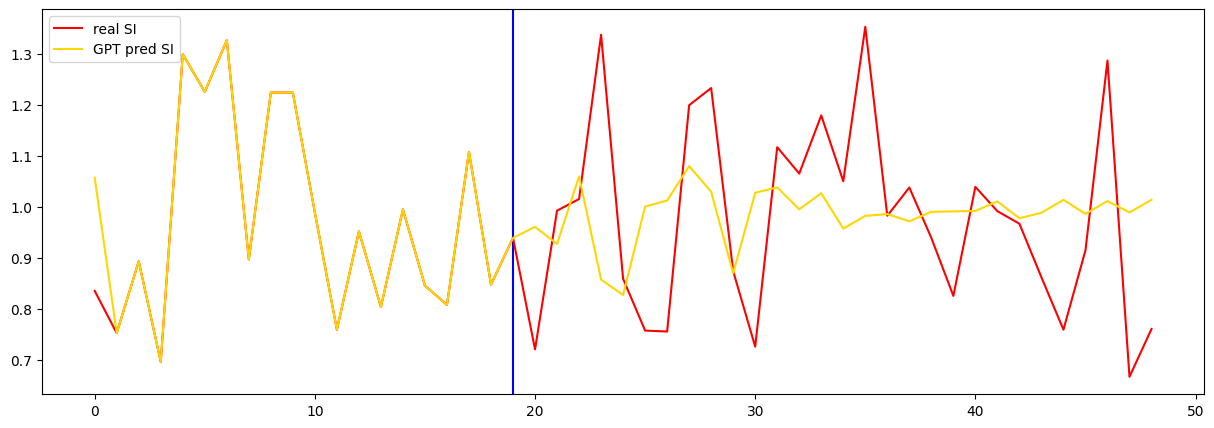

In [38]:

inferenceGPT_obj.the_offset = 45
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 060 to 075


0 train loss =  1.0000152587890625
seq length of pred =  30
[0.49983704 0.50016296]
[tensor(1.5314, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.4390, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.000013828277588
seq length of pred =  30
[0.49997185 0.50002815]
[tensor(1.3918, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3980, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000132322311401
seq length of pred =  30
[0.50017878 0.49982122]
[tensor(1.3223, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3308, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.0000145435333252
seq length of pred =  30
[0.49984881 0.50015119]
[tensor(1.4441, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.5238, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.0000137090682983
seq length of pred =  30
[0.50035122 0.49964878]
[tensor(1.3681, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.2745, devi

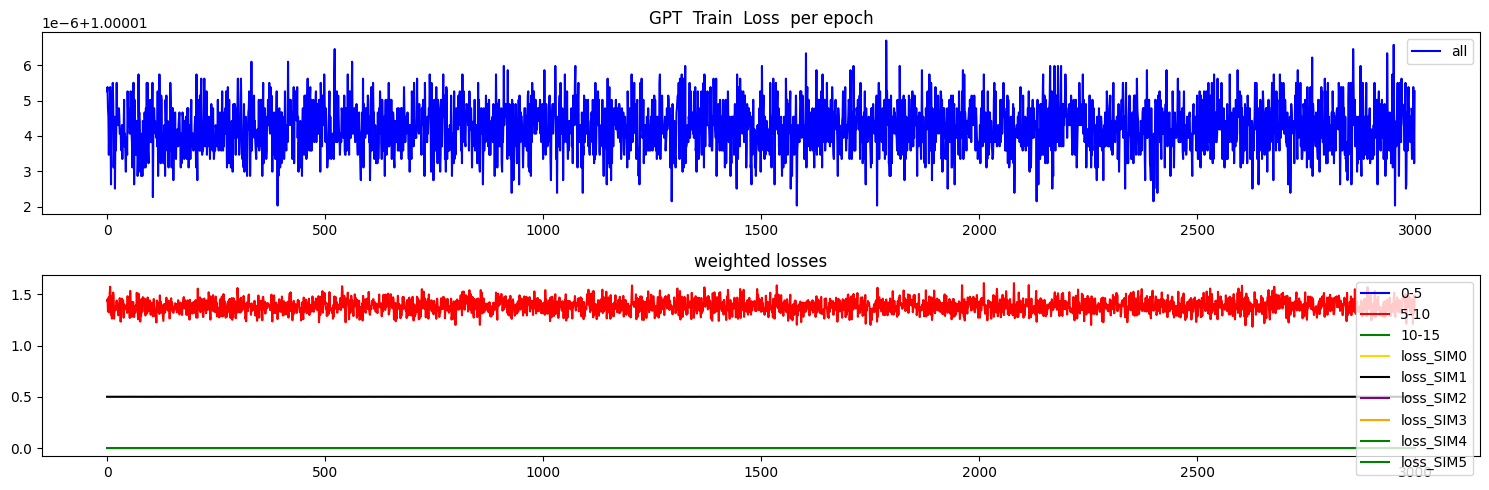

max tokens  29
torch.Size([1, 20, 27])
(49,)
(49,)
Test MSE Loss - SI only:  0.04674497991800308
Test MSE Loss - SI only 0-5:  0.1477806270122528
Test MSE Loss - SI only 5-10:  0.02324439212679863
Test MSE Loss - SI only 10-15:  0.024498669430613518
mae, mse, rmse, mape, mspe, rse, corr
(0.17412528, 0.04674498, 0.21620588, 8.828546, 2055.0586, 1.637996)
Testing R**2 - SI only:  -1.6830309290170877
Testing R**2 - SI only:  -1.6830309290170877
Testing R**2 - All features:  0.9971702950708443
Testing R**2 - (f2) - SI full:  -0.36793139418987164


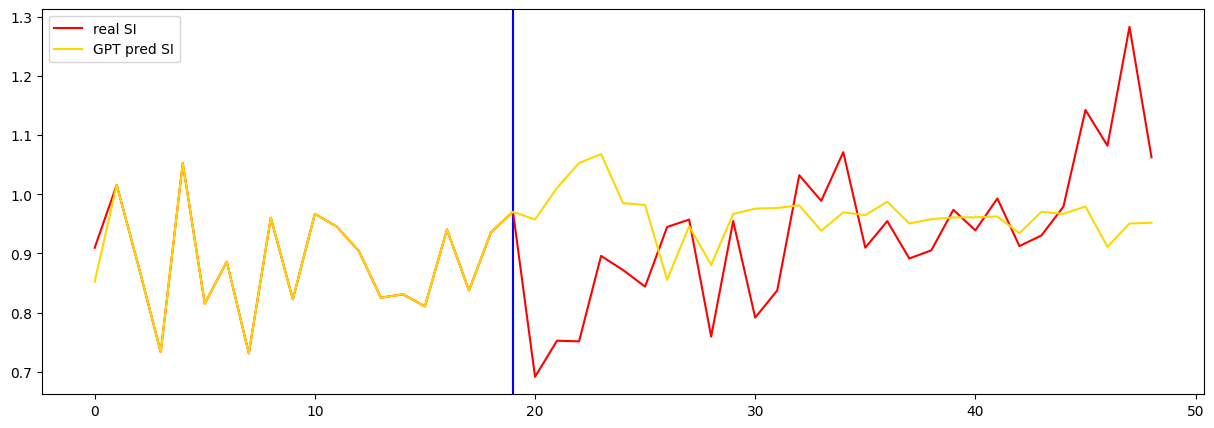

In [39]:

inferenceGPT_obj.the_offset = 60
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 075 to 090


In [40]:

inferenceGPT_obj.the_offset = 75
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )


0 train loss =  1.0000147819519043
seq length of pred =  30
[0.49977988 0.50022012]
[tensor(1.4785, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3786, device='cuda:0', grad_fn=<MseLossBackward0>)]
200 train loss =  1.0000146627426147
seq length of pred =  30
[0.49984496 0.50015504]
[tensor(1.4692, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3741, device='cuda:0', grad_fn=<MseLossBackward0>)]
400 train loss =  1.0000147819519043
seq length of pred =  30
[0.49966356 0.50033644]
[tensor(1.4782, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3252, device='cuda:0', grad_fn=<MseLossBackward0>)]
600 train loss =  1.0000145435333252
seq length of pred =  30
[0.49968889 0.50031111]
[tensor(1.4576, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3760, device='cuda:0', grad_fn=<MseLossBackward0>)]
800 train loss =  1.0000141859054565
seq length of pred =  30
[0.49984897 0.50015103]
[tensor(1.4142, device='cuda:0', grad_fn=<MseLossBackward0>), tensor(1.3618, dev

KeyboardInterrupt: 


## 090 to 105


In [ ]:

inferenceGPT_obj.the_offset = 90
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## Save excel to csv


In [ ]:
 
inferenceGPT_obj.save_Excel_to_CSV()



## Add the dates ( ??) 


In [ ]:

tsDataWrangling_obj.add_dates_after_GPT_is_trained( tsGPT_obj )
